**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center>
<center>слушателя Васина Михаила Владимировича<br>группы № 047-гз </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Python для анализа данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> Москва, 2024

### Цель исследования:

Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на решение клиента заключить банковский депозитный договор во время проведения маркетинговой кампании по обзвону потенциальных клиентов.
Для анализа используется набор данных из [Kaggle](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data) (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 21 признаков (10 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление рекомендаций развития бизнеса в зависимости от образования респондентов</a><br>
<a href=#4>4.  Исследование статистических показателей зависимости факта заключения депозитного договора от общего количества контактов с респондентом</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Столбцы данных

#### Информация о клиенте:
|Признак|Описание|Тип|Значения|
|--|--|--|--|
|`Age`|Возраст|numeric|0..100|
|`Job`|Вид работы|categorical|'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'|
|`Marital`|Семейное положение|categorical|'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed|
|`Education`|Образование|categorical|'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'|
|`Default`|Имеет ли дефолт по кредиту (неисполнение кредитных обязательств)?|categorical|'no', 'yes', 'unknown'|
|`Housing`|Имеет ли кредит на недвижимость?|categorical|'no', 'yes', 'unknown'|
|`Loan`|Имеет ли личный кредит?|categorical|'no', 'yes', 'unknown'|

#### Связанные с последним контактом в этой маркетинговой компании:  
|Признак|Описание|Тип|Значения|
|--|--|--|--|
|`Contact`|Способ связи|categorical|'cellular','telephone'|
|`Month`|Месяц последнего контакта|categorical|'jan', 'feb', 'mar', …, 'nov', 'dec'|
|`Day_of_week`|День недели последнего контакта|categorical|'mon','tue','wed','thu','fri'|
|`Duration`|Длительность последнего контакта, сек.|numeric||

**Важно**: Необходимо обратить внимание: если `Duration` == 0, то и y == 'no'. Так же, если `Duration` == 0, то и использовать эту строку в исследовании бессмысленно.

#### Прочие данные:  
|Признак|Описание|Тип|Значения|
|--|--|--|--|
|`Campaign`|Кол-во контактов с данным респондентом в течение данной маркетинговой компании|numeric, includes last contact||
|`Pdays`|Число дней прошедших с последнего контакта с данным респондентом во время предыдущей компании|numeric; 999 означает, что ранее с этим респондентом контактов не было||
|`Previous`|Кол-во контактов с данным респондентом до текущей маркетинговой компании|numeric||
|`Poutcome`|Результат предыдущих контактов|categorical|'failure','nonexistent','success'|

#### Социальные и экономические показатели:  
|Признак|Описание|Тип|Значения|
|--|--|--|--|
|`Emp.var.rate`|Динамика занятости - квартальный индикатор|numeric||
|`Cons.price.idx`|Индекс потребительских цен - ежемесячный индикатор|numeric||
|`Cons.conf.idx`|Индекс потребительской уверенности - ежемесячный индикатор|numeric||
|`Euribor3m`|Европейская межбанковская ставка предложения (3-х месячная) - ежедневный индикатор|numeric||
|`Nr.employed`|Занятость - квартальный индикатор|numeric||

#### Результат компании по данному респонденту:  
|Признак|Описание|Тип|Значения|
|--|--|--|--|
|`y`|Респондент заключил депозитный договор?|binary|'yes', 'no'|


# Импорт необходимых библиотек

In [1778]:
#------------------------------------------------------------------70
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# https://pandas.pydata.org/pandas-docs/stable/
# user_guide/categorical.html#categoricaldtype
from pandas.api.types import CategoricalDtype

import scipy.stats as st
# импорт библиотеки warnings
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import calendar as clnd
import datetime as dt

# Размер фигуры
FIG_SIZE = (8, 6)

# Варианты положения подписи под иллюстрацией
FIG_TEXT_POS = (0.1, -0.05)
FIG_TEXT_POS_L = (0.1, -0.1)
FIG_TEXT_POS_XL = (0.1, -0.2)

# Загрузка данных

In [1779]:
#----------------------------------------------------------------------------80
df = pd.read_csv('./bank-additional-full.csv', sep=';')
# df = pd.read_csv('https://raw.githubusercontent.com/CorvusCoraks/\
# data_analysis_bank_phone_marketing/main/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [1780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Количество значений в столбцах не различается. Это говорит о том, что в данных нет пустых значений. Ниже, для окончательной проверки с помощью библиотеки Seaborn будет построена тепловая карта для визуализации данных.

In [1781]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Вызывает удивление максимальное значение в столбце `campaign`. В дальнейшем рассмотреть поподробнее.

#  <a name="1">1. Предобработка данных</a>

Подготовка данных к анализу (очистка данных, трансформация данных, дополнение, оптимизация):  
* Заменить названия столбцов (привести к нижнему регистру).
* Заменить (при необходимости) точки в названиях столбцов на подчёркивания.
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.  
* Обработать пропуски при необходимости.  

In [1782]:
# Словарь для замены типа столбца на bool
yes_no: dict = {'yes': True, 'no': False}

## Переименование столбцов.

### Текущее состояние

In [1783]:
df.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [1784]:
df = df.rename(columns={
    'contact': 'phone_or_cell',
    'campaign': 'contacts',
    'pdays': 'p_days',
    'previous': 'p_contacts',
    'poutcome': 'p_outcome',
    'emp.var.rate': 'emp_var_rate_q', 
    'cons.price.idx': 'cons_price_idx_m', 
    'cons.conf.idx': 'cons_conf_idx_m', 
    'euribor3m': 'euribor_3m', 
    'nr.employed': 'nr_employed_q', 
    'y': 'is_success'})

Префикс `p_` означает принадлежность данных к предыдущей маркетинговой компании.  

Постфиксы:  
`_m` - месячный индикатор,  
`_3m` - трёхмесячный индикатор,  
`_q` - квартальный индикатор.  

### С новыми названиями

In [1785]:
df.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
phone_or_cell,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


## Обработка отдельных столбцов

### Столбец job

In [1786]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1787]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Одно из значений имеет незначимую точку в конце: `admin.` Удаление излишней точки.

In [1788]:
df['job'] = df['job'].replace('admin.', 'admin')
df['job'].value_counts()

job
admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1789]:
#------------------------------------------------------------------70
job_cats = ['housemaid', 'services', 'admin', 'blue-collar', 
            'technician', 'retired', 'management', 'unemployed', 
            'self-employed', 'unknown', 'entrepreneur', 'student']

covered_type = CategoricalDtype(
    categories=job_cats)
covered_type

CategoricalDtype(categories=['housemaid', 'services', 'admin', 'blue-collar',
                  'technician', 'retired', 'management', 'unemployed',
                  'self-employed', 'unknown', 'entrepreneur', 'student'],
, ordered=False, categories_dtype=object)

In [1790]:
df['job'] = df['job'].astype(covered_type)

In [1791]:
df['job'].value_counts()

job
admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [1792]:
df['job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: job
Non-Null Count  Dtype   
--------------  -----   
41188 non-null  category
dtypes: category(1)
memory usage: 40.7 KB


### Столбец marital

In [1793]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [1794]:
marital_cats = ['married', 'single', 'divorced', 'unknown']

covered_type = CategoricalDtype(
    categories=marital_cats)
covered_type

CategoricalDtype(categories=['married', 'single', 'divorced', 'unknown'], ordered=False, categories_dtype=object)

In [1795]:
df['marital'] = df['marital'].astype(covered_type)

In [1796]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [1797]:
df['marital'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: marital
Non-Null Count  Dtype   
--------------  -----   
41188 non-null  category
dtypes: category(1)
memory usage: 40.6 KB


### Столбец education

In [1798]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

В некоторых значениях есть точки. Замена на подчёркивания.

In [1799]:
df['education'] = df['education'].replace(
    {
    'university.degree': 'univ_degree', 
    'high.school': 'high_school', 
    'basic.9y': 'basic_9y', 
    'professional.course': 'prof_course', 
    'basic.4y': 'basic_4y', 
    'basic.6y': 'basic_6y'
    }
)

In [1800]:
df['education'].value_counts()

education
univ_degree    12168
high_school     9515
basic_9y        6045
prof_course     5243
basic_4y        4176
basic_6y        2292
unknown         1731
illiterate        18
Name: count, dtype: int64

In [1801]:
# Создание упорядоченного по росту образованности 
# категориального типа для столбца
edu_cats = [
    'unknown',
    'illiterate',
    'basic_4y', 
    'basic_6y', 
    'basic_9y', 
    'high_school', 
    'prof_course', 
    'univ_degree'
]

covered_type = CategoricalDtype(
    categories=edu_cats,
    ordered=True) # учитывать порядок категорий
covered_type

CategoricalDtype(categories=['unknown', 'illiterate', 'basic_4y', 'basic_6y', 'basic_9y',
                  'high_school', 'prof_course', 'univ_degree'],
, ordered=True, categories_dtype=object)

In [1802]:
df['education'] = df['education'].astype(covered_type)

In [1803]:
df['education'].value_counts()

education
univ_degree    12168
high_school     9515
basic_9y        6045
prof_course     5243
basic_4y        4176
basic_6y        2292
unknown         1731
illiterate        18
Name: count, dtype: int64

In [1804]:
df['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: education
Non-Null Count  Dtype   
--------------  -----   
41188 non-null  category
dtypes: category(1)
memory usage: 40.7 KB


### Столбец default

In [1805]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [1806]:
#------------------------------------------------------------------70
print(f"Неизвестных значений по наличию дефолта: {
round(df['default'].value_counts()['unknown'] * 100 / len(df))}%")

Неизвестных значений по наличию дефолта: 21%


Что достаточно много, а значит, удалять нельзя.

In [1807]:
default_cats = [
    'no', 
    'yes', 
    'unknown'
]

covered_type = CategoricalDtype(
    categories=default_cats)
covered_type

CategoricalDtype(categories=['no', 'yes', 'unknown'], ordered=False, categories_dtype=object)

In [1808]:
df['default'] = df['default'].astype(covered_type)

In [1809]:
df['default'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: default
Non-Null Count  Dtype   
--------------  -----   
41188 non-null  category
dtypes: category(1)
memory usage: 40.5 KB


In [1810]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

### Столбец housing

In [1811]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [1812]:
print(f"Неизвестных значений по наличию ипотечного кредита: {
round(df['housing'].value_counts()['unknown'] * 100 / len(df))}%")

Неизвестных значений по наличию ипотечного кредита: 2%


Значит, можно удалить.  
Удаление.

In [1813]:
#------------------------------------------------------------------70
df = df.drop(index=df[df['housing'] == 'unknown'].index)

In [1814]:
df['housing'].value_counts()

housing
yes    21576
no     18622
Name: count, dtype: int64

In [1815]:
df['housing'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: housing
Non-Null Count  Dtype 
--------------  ----- 
40198 non-null  object
dtypes: object(1)
memory usage: 628.1+ KB


Замена типа столбца на bool

In [1816]:
df['housing'] = df['housing'].\
apply(lambda b: yes_no[b]).astype(bool)

In [1817]:
df['housing'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: housing
Non-Null Count  Dtype
--------------  -----
40198 non-null  bool 
dtypes: bool(1)
memory usage: 353.3 KB


In [1818]:
df['housing'].value_counts()

housing
True     21576
False    18622
Name: count, dtype: int64

### Столбец loan

In [1819]:
df['loan'].value_counts()

loan
no     33950
yes     6248
Name: count, dtype: int64

In [1820]:
df['loan'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: loan
Non-Null Count  Dtype 
--------------  ----- 
40198 non-null  object
dtypes: object(1)
memory usage: 628.1+ KB


Замена тип столбца на bool

In [1821]:
#------------------------------------------------------------------70
df['loan'] = df['loan'].apply(lambda b: yes_no[b]).astype(bool)

In [1822]:
df['loan'].value_counts()

loan
False    33950
True      6248
Name: count, dtype: int64

In [1823]:
df['loan'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: loan
Non-Null Count  Dtype
--------------  -----
40198 non-null  bool 
dtypes: bool(1)
memory usage: 353.3 KB


### Столбец phone_or_cell

In [1824]:
df['phone_or_cell'].value_counts()

phone_or_cell
cellular     25583
telephone    14615
Name: count, dtype: int64

In [1825]:
phone_or_cell_cats = [
    'cellular', 
    'telephone'
]

covered_type = CategoricalDtype(
    categories=phone_or_cell_cats)
covered_type

CategoricalDtype(categories=['cellular', 'telephone'], ordered=False, categories_dtype=object)

In [1826]:
df['phone_or_cell'] = df['phone_or_cell'].astype(covered_type)

In [1827]:
df['phone_or_cell'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: phone_or_cell
Non-Null Count  Dtype   
--------------  -----   
40198 non-null  category
dtypes: category(1)
memory usage: 353.4 KB


In [1828]:
df['phone_or_cell'].value_counts()

phone_or_cell
cellular     25583
telephone    14615
Name: count, dtype: int64

Изменения не требуются.

### Столбец month

In [1829]:
df['month'].value_counts()

month
may    13419
jul     7027
aug     6048
jun     5143
nov     4025
apr     2574
oct      698
sep      554
mar      534
dec      176
Name: count, dtype: int64

Тип меняем на категорийный.

In [1830]:
month_cats = [
    'mar', 
    'apr', 
    'may', 
    'jun', 
    'jul', 
    'aug', 
    'sep', 
    'oct', 
    'nov', 
    'dec'
]

covered_type = CategoricalDtype(
    categories=month_cats,
    ordered=True) # учитывать порядок категорий
covered_type

CategoricalDtype(categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                  'nov', 'dec'],
, ordered=True, categories_dtype=object)

In [1831]:
df['month'] = df['month'].astype(covered_type)

In [1832]:
df['month'].value_counts()

month
may    13419
jul     7027
aug     6048
jun     5143
nov     4025
apr     2574
oct      698
sep      554
mar      534
dec      176
Name: count, dtype: int64

In [1833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               40198 non-null  int64   
 1   job               40198 non-null  category
 2   marital           40198 non-null  category
 3   education         40198 non-null  category
 4   default           40198 non-null  category
 5   housing           40198 non-null  bool    
 6   loan              40198 non-null  bool    
 7   phone_or_cell     40198 non-null  category
 8   month             40198 non-null  category
 9   day_of_week       40198 non-null  object  
 10  duration          40198 non-null  int64   
 11  contacts          40198 non-null  int64   
 12  p_days            40198 non-null  int64   
 13  p_contacts        40198 non-null  int64   
 14  p_outcome         40198 non-null  object  
 15  emp_var_rate_q    40198 non-null  float64 
 16  cons_price_idx_m  40198 non

### Столбец day_of_week

In [1834]:
df['day_of_week'].value_counts()

day_of_week
thu    8434
mon    8323
wed    7937
tue    7880
fri    7624
Name: count, dtype: int64

In [1835]:
days_cats = [
    'mon', 
    'tue', 
    'wed', 
    'thu', 
    'fri'
]

covered_type = CategoricalDtype(
    categories=days_cats,
    ordered=True) # учитывать порядок категорий
covered_type

CategoricalDtype(categories=['mon', 'tue', 'wed', 'thu', 'fri'], ordered=True, categories_dtype=object)

In [1836]:
#------------------------------------------------------------------70
df['day_of_week'] = df['day_of_week'].astype(covered_type)

In [1837]:
df['day_of_week'].value_counts()

day_of_week
thu    8434
mon    8323
wed    7937
tue    7880
fri    7624
Name: count, dtype: int64

In [1838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               40198 non-null  int64   
 1   job               40198 non-null  category
 2   marital           40198 non-null  category
 3   education         40198 non-null  category
 4   default           40198 non-null  category
 5   housing           40198 non-null  bool    
 6   loan              40198 non-null  bool    
 7   phone_or_cell     40198 non-null  category
 8   month             40198 non-null  category
 9   day_of_week       40198 non-null  category
 10  duration          40198 non-null  int64   
 11  contacts          40198 non-null  int64   
 12  p_days            40198 non-null  int64   
 13  p_contacts        40198 non-null  int64   
 14  p_outcome         40198 non-null  object  
 15  emp_var_rate_q    40198 non-null  float64 
 16  cons_price_idx_m  40198 non

### Столбец duration

In [1839]:
df['duration'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: duration
Non-Null Count  Dtype
--------------  -----
40198 non-null  int64
dtypes: int64(1)
memory usage: 628.1 KB


Можно изменить тип столбца в timedelta, но в контексте исследования это не имеет смысла. Столбец уже имеет числовое значение.

### Столбец contacts

In [1840]:
df['contacts'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: contacts
Non-Null Count  Dtype
--------------  -----
40198 non-null  int64
dtypes: int64(1)
memory usage: 628.1 KB


In [1841]:
df['contacts'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43], dtype=int64)

Максимальное значение на выброс не похоже, так как перед ним идёт достаточно плавный подъём меньших величин.

Изменений не требует.

### Столбец p_days

In [1842]:
df['p_days'].value_counts()

p_days
999    38717
3        429
6        404
4        115
9         62
2         60
7         58
12        56
10        48
5         46
13        36
11        28
1         26
15        24
14        20
8         16
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [1843]:
df['p_days'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: p_days
Non-Null Count  Dtype
--------------  -----
40198 non-null  int64
dtypes: int64(1)
memory usage: 628.1 KB


In [1844]:
df['p_days'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  25,  26,  27,
       999], dtype=int64)

Количество дней - 999 означает, что во время предыдущей компании с респондентом контактов не было. Наличие нуля говорит о том, что предыдущая маркетинговая компания идёт в стык (без разрыва) с текущей.

Наличие маркера 999 автоматически превращает данные в категорийные. Чтобы этого не было, 999 меняем на -1, что так же сохранит смысл маркера, но не будет сильно выбиваться из общего ряда чисел.

In [1845]:
df.loc[df['p_days'] == 999, 'p_days'] = -1

In [1846]:
df['p_days'].value_counts()

p_days
-1     38717
 3       429
 6       404
 4       115
 9        62
 2        60
 7        58
 12       56
 10       48
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        16
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: count, dtype: int64

### Столбец p_contacts

In [1847]:
df['p_contacts'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

Изменений не требуется.

### Столбец p_outcome

In [1848]:
df['p_outcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [1849]:
p_outcome_cats = ['nonexistent', 'failure', 'success']

covered_type = CategoricalDtype(
    categories=p_outcome_cats)
covered_type

CategoricalDtype(categories=['nonexistent', 'failure', 'success'], ordered=False, categories_dtype=object)

In [1850]:
df['p_outcome'] = df['p_outcome'].astype(covered_type)

In [1851]:
df['p_outcome'].value_counts()

p_outcome
nonexistent    34712
failure         4141
success         1345
Name: count, dtype: int64

In [1852]:
df['p_outcome'].info()

<class 'pandas.core.series.Series'>
Index: 40198 entries, 0 to 41187
Series name: p_outcome
Non-Null Count  Dtype   
--------------  -----   
40198 non-null  category
dtypes: category(1)
memory usage: 353.4 KB


### Столбец is_success

In [1853]:
df['is_success'].value_counts()

is_success
no     35665
yes     4533
Name: count, dtype: int64

Изменение типа содержимого на bool

In [1854]:
df['is_success'] = df['is_success'].apply(lambda b: yes_no[b])
df['is_success'].value_counts()

is_success
False    35665
True      4533
Name: count, dtype: int64

### Итого

In [1855]:
df.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin,services
marital,married,married,married,married,married
education,basic_4y,high_school,high_school,basic_6y,high_school
default,no,unknown,no,no,no
housing,False,False,True,False,False
loan,False,False,False,False,True
phone_or_cell,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [1856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               40198 non-null  int64   
 1   job               40198 non-null  category
 2   marital           40198 non-null  category
 3   education         40198 non-null  category
 4   default           40198 non-null  category
 5   housing           40198 non-null  bool    
 6   loan              40198 non-null  bool    
 7   phone_or_cell     40198 non-null  category
 8   month             40198 non-null  category
 9   day_of_week       40198 non-null  category
 10  duration          40198 non-null  int64   
 11  contacts          40198 non-null  int64   
 12  p_days            40198 non-null  int64   
 13  p_contacts        40198 non-null  int64   
 14  p_outcome         40198 non-null  category
 15  emp_var_rate_q    40198 non-null  float64 
 16  cons_price_idx_m  40198 non

## Матрица пропущеных значений (heatmap)

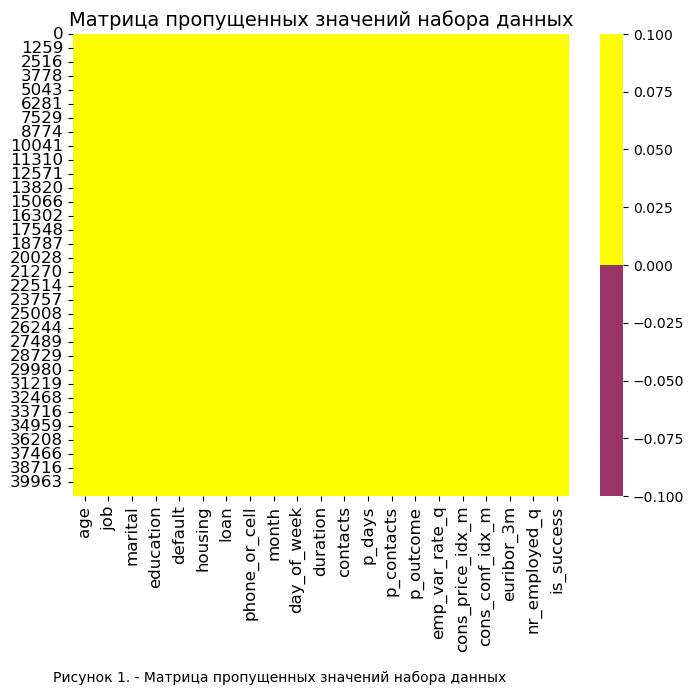

In [1857]:
#------------------------------------------------------------------70
colours = ['#993366', '#FFFF00']
fig = plt.figure(figsize=FIG_SIZE)
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(*FIG_TEXT_POS_XL, "Рисунок 1. - Матрица \
пропущенных значений набора данных")
plt.show()

Пропущеных значений нет.

## Описание столбцов с изменениями.

In [1858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               40198 non-null  int64   
 1   job               40198 non-null  category
 2   marital           40198 non-null  category
 3   education         40198 non-null  category
 4   default           40198 non-null  category
 5   housing           40198 non-null  bool    
 6   loan              40198 non-null  bool    
 7   phone_or_cell     40198 non-null  category
 8   month             40198 non-null  category
 9   day_of_week       40198 non-null  category
 10  duration          40198 non-null  int64   
 11  contacts          40198 non-null  int64   
 12  p_days            40198 non-null  int64   
 13  p_contacts        40198 non-null  int64   
 14  p_outcome         40198 non-null  category
 15  emp_var_rate_q    40198 non-null  float64 
 16  cons_price_idx_m  40198 non

### Bank client data:
* `age` (numeric): Возраст
* `job` : Вид работы (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* `marital` : Семейное положение (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* `education`: Образование (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* `default`:Имеет ли дефолт по кредиту (неисполнение кредитных обязательств)? (categorical: 'no', 'yes', 'unknown')
* `housing`: Имеет ли кредит на недвижимость? (boolean: True, False,)
* `loan`: Имеет ли личный кредит? (boolean: True, False)

### Related with the last contact of the current campaign:  
* `phone_or_cell`: Способ связи (categorical: 'cellular','telephone')
* `month`: Месяц последнего контакта (datetime64: '1900-01-01', …,'1900-12-01')
* `day_of_week`: День недели последнего контакта (datetime64: '1900-01-01', ..., '1900-01-07')
* `duration`: Длительность последнего контакта, сек. (numeric).

**Важно**: Необходимо обратить внимание: если `duration` == 0, то и `is_success` == 'no'. Так же, если `duration` == 0, то и использовать эту строку в исследовании бессмысленно.

### Прочие данные:  
* `contacts`: Кол-во контактов с данным респондентом в течение данной маркетинговой компании (numeric, includes last contact)
* `p_days`: Число дней прошедших с последнего контакта с данным респондентом во время предыдущей компании. (numeric; 999 означает, что ранее с этим респондентом контактов не было.)
* `p_contacts`: Кол-во контактов с данным респондентом до текущей маркетинговой компании (numeric)
* `p_outcome`: Результат предыдущих контактов. (categorical: 'failure','nonexistent','success')

### Социальные и экономические показатели:  
* `emp_var_rate_q`: Динамика занятости - квартальный индикатор (numeric)
* `cons_price_idx_m`: Индекс потребительских цен - ежемесячный индикатор (numeric)
* `cons_conf_idx_m`: Индекс потребительской уверенности - ежемесячный индикатор (numeric)
* `euribor_3m`: Европейская межбанковская ставка предложения (3-х месячная) - ежедневный индикатор (numeric)
* `nr_employed_q`: Занятость - квартальный индикатор (numeric)

### Результат компании по данному респонденту:  
`is_success` - Респондент заключил депозитный договор? (boolean: True, False)


#  <a name="2"> 2. Исследовательский анализ данных</a>

## Средний возраст респондента в разрезе заключённого договора.

In [1859]:
print(f"Средний возраст респондента \
заключившего депозитный договор с банком, лет:\
{round(df.loc[df['is_success'], 'age'].mean(), 2)}")

Средний возраст респондента заключившего депозитный договор с банком, лет:40.91


Text(0.1, -0.05, 'Рисунок 2. - Гистограмма возрастов респондентов.')

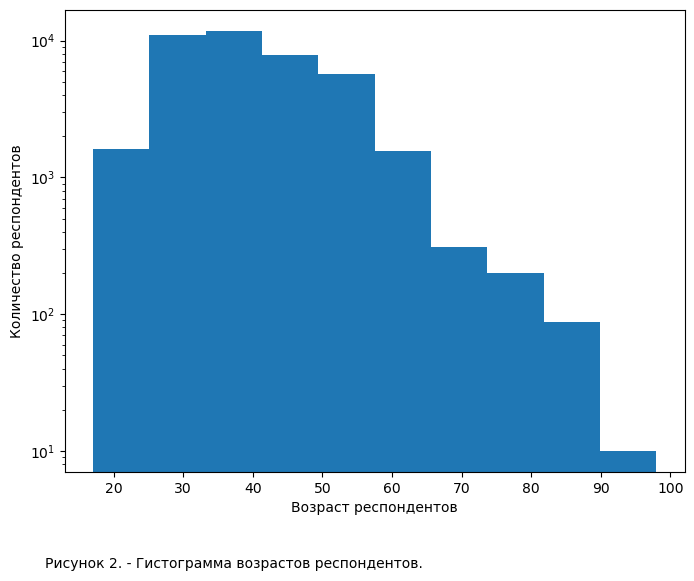

In [1860]:
#------------------------------------------------------------------70
plt.figure(figsize=FIG_SIZE)
plt.hist(x=df['age'], log=True)
plt.ylabel("Количество респондентов")
plt.xlabel("Возраст респондентов")
plt.figtext(*FIG_TEXT_POS, "Рисунок 2. \
- Гистограмма возрастов респондентов.")

## Средняя закредитованность

### По наличию ипотечного кредита в разрезе семейного положения.

In [1861]:
dfa = df.loc[df['housing'], ['housing', 'marital']]\
    .groupby(by='marital', observed=False)['housing'].count()
dfa

marital
married     12951
single       6191
divorced     2399
unknown        35
Name: housing, dtype: int64

Абсолютные цифры ипотечных кредитов видны выше.

Средняя закредитованность ипотечными кредитами в разрезе семейного положения:

In [1862]:
dfa = dfa.values.mean()
dfa

5394.0

Данная цифра бесполезна, на самом деле. Гораздо интереснее посмотреть закредитованность по ипотечному кредиту в разрезе семейного положения (произведена стратификация выборки).

In [1863]:
dfa = pd.crosstab(index=df['housing'], columns=df['marital'])

In [1864]:
# Таблица сопряжённости наличия ипотечного кредита в зависимости от семейного статуса.
dfa

marital,married,single,divorced,unknown
housing,,,,
False,11389,5097,2092,44
True,12951,6191,2399,35


Text(0.1, -0.05, 'Рисунок 3. - Наличие (или отсутствие) ипотечного кредита \n в зависимости от состояния в браке.')

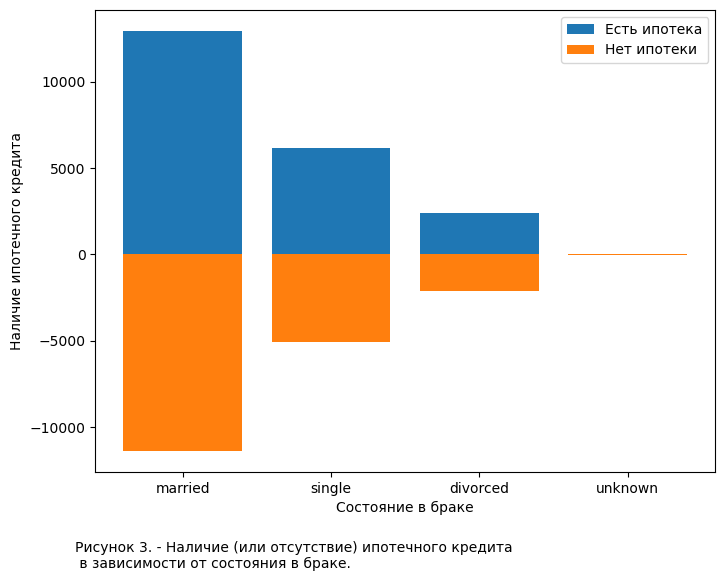

In [1865]:
#------------------------------------------------------------------70
plt.figure(figsize=FIG_SIZE)

plt.bar(
    x=df['marital'].sort_values().unique(), 
    height=df.loc[df['housing'], ['housing', 'marital']]\
        .groupby(by='marital', observed=False)['housing'].count(),
    label="Есть ипотека"
)
plt.bar(
    x=df['marital'].sort_values().unique(), 
    height=df.loc[~df['housing'], ['housing', 'marital']]\
        .groupby(by='marital', observed=False)['housing'].count() * -1,
    label="Нет ипотеки"
)
plt.xlabel("Состояние в браке")
plt.ylabel("Наличие ипотечного кредита")
plt.legend()
plt.figtext(*FIG_TEXT_POS, "Рисунок 3. - Наличие (или отсутствие) \
ипотечного кредита \n в зависимости от состояния в браке.")

Иллюстрация наглядно показывает, что не зависимо от состояния в браке, приблизительно половина респондентов имеет ипотечный кредит.

In [1866]:
# Наличие ипотечного кредита относительно всего количества 
# респондентов в соответствующей категории.
dfa.loc[True, :] / (dfa.loc[:, :].sum())

marital
married     0.532087
single      0.548459
divorced    0.534179
unknown     0.443038
dtype: float64

Цифры реально подтверждают иллюстрацию: чуть больше половины женатых, разведённых и одиночек (53-55%) имеют ипотечный кредит.

Что интересно, опровергается возможный миф: одинокие люди не на много, но большее отягощены ипотечными кредитами. А разведённые имеют практически такую же ипотечную нагрузку, что и женатые, что говорит, возможно, о том, что просле развода люди продолжают выплачивать ипотечный кредит (не закрывают его)

### По наличию прочих кредитов в зависимости от образования.

Таблица сопряжённости (как и в предыдущем случае необходима стратификация выборки)

In [1867]:
pdc = pd.crosstab(index=df['loan'], columns=df['education'])
# Переименование столбцов bool в int 
# (seaborn не печатает иначе тепловую карту)
pdt = pdc.T.rename(columns={True: 1, False: 0}).T
pdt

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
loan,,,,,,,,
0,1449,15,3435,1902,5011,7852,4325,9961
1,242,3,624,330,883,1443,793,1930


Text(0.1, -0.2, 'Рисунок 4. - Количество респондентов в категории (в абсолютных значениях) \n имеющих неипотечный кредит и без кредита с разбивкой по образованию')

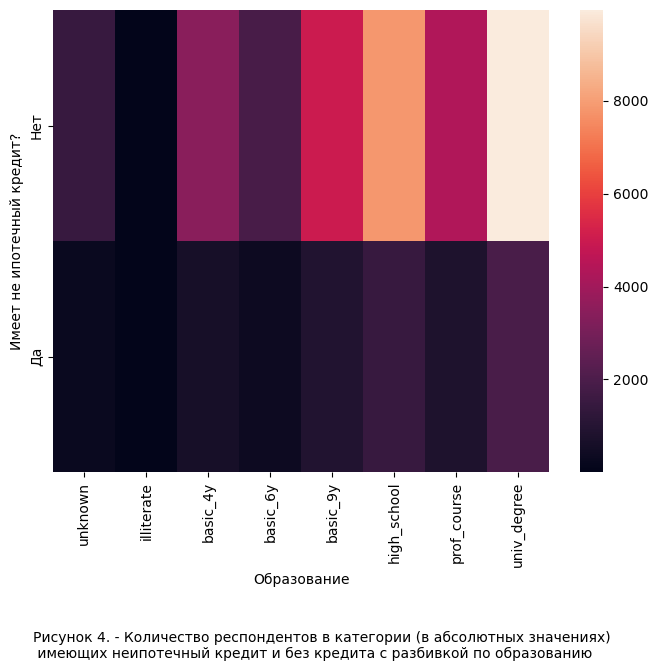

In [1868]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

sns.heatmap(data=pdt, yticklabels=['Нет', 'Да'])
plt.ylabel("Имеет не ипотечный кредит?")
plt.xlabel("Образование")

plt.figtext(*FIG_TEXT_POS_XL, 
            "Рисунок 4. - Количество респондентов в категории \
(в абсолютных значениях) \n имеющих неипотечный кредит и \
без кредита с разбивкой по образованию")

Как видно из температурной карты, больше всего респондентов не имеющих кредита (кроме ипотечного) в категории университетского образования. Более того можно отметить, что с ростом образования растёт и кредитная нагрузка и количество людей избегающих кредитов. Так ли это действительно?

Посмотрим тепловую карту кредитной нагрузки, но данные нормализуем к сумме по горизонтали. Имеющих кредит соотнесём ко всем респондентам имеющим кредит, а неимеющих кредит соотнесёт ко всем неимеющим.

In [1869]:
pdc = pd.crosstab(index=df['loan'], columns=df['education'], normalize='index')
# Переименование столбцов bool в int (seaborn не печатает иначе тепловую карту)
pdt = pdc.T.rename(columns={True: 1, False: 0}).T

Text(0.1, -0.2, 'Рисунок 5. - Относительное количество респондентов с кредитом\n (или без) к имеющим кредит \n (или без) с разбивкой по образованию')

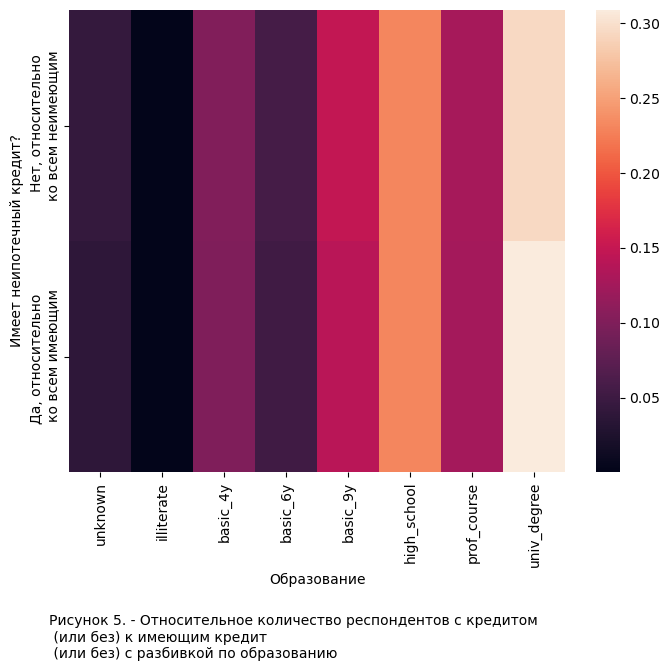

In [1870]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

sns.heatmap(data=pdt, yticklabels=['Нет, относительно \nко всем неимеющим', \
                                   'Да, относительно \nко всем имеющим'])
plt.ylabel("Имеет неипотечный кредит?")
plt.xlabel("Образование")

plt.figtext(*FIG_TEXT_POS_XL, "Рисунок 5. \
- Относительное количество респондентов с кредитом\n (или без) \
к имеющим кредит \n (или без) с разбивкой по образованию")

И тут становится видно, что независимо от образования, определённая часть респондентов имеет неипотечный кредит. Что можно подтвердить и в цифрах:

In [1871]:
pdt

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
loan,,,,,,,,
0,0.042680,0.000442,0.101178,0.056024,0.147599,0.231281,0.127393,0.293402
1,0.038732,0.000480,0.099872,0.052817,0.141325,0.230954,0.126921,0.308899


И этот процент имеющих (ко всем имеющим) практически совпадает с процентом неимеющих (ко всем неимеющим).

А какой процент в каждой страте (по образоанию) имеет кредит кроме ипотечного?

In [1872]:
pdc = pd.crosstab(index=df['loan'], columns=df['education'], 
                  normalize='columns')
# Переименование столбцов bool в int 
# (seaborn не печатает иначе тепловую карту)
pdt = pdc.T.rename(columns={True: 1, False: 0}).T
pdt

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
loan,,,,,,,,
0,0.856889,0.833333,0.846268,0.852151,0.850187,0.844755,0.845057,0.837692
1,0.143111,0.166667,0.153732,0.147849,0.149813,0.155245,0.154943,0.162308


Можно сказать, что независимо от образования, доля имеющих кредит (не ипотечный) практически одинакова. В дальнейшем будет интересно исследовать вопрос, является ли статистически значимым такое совпадение

Обратим внимание, что относительную максимальную закредитованность 16,7% имеют неграмотные (хотя их в выборке всег 18 человек).   
Вторыми идут получившие университетсвкое образование - 16,23%. Скорее всего, это сказываются кредиты на образование.  
Дальше идут старшие школьники (возможно это кредит на колледж?) - 15,5%, выпускники профессиональных курсов - 15,5%  

## Диаграммы общей закредитованности

### В зависимости от уровня образования.

In [1873]:
# Таблица сопряжённости Образование - Ипотечный кредит
dfh = pd.crosstab(index=df['housing'], columns=df['education'])
dfh

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
housing,,,,,,,,
False,816,8,1955,1070,2743,4363,2280,5387
True,875,10,2104,1162,3151,4932,2838,6504


In [1874]:
# Таблица сопряжённости Образование - Прочие кредиты
dfl = pd.crosstab(index=df['loan'], columns=df['education'])
dfl

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
loan,,,,,,,,
False,1449,15,3435,1902,5011,7852,4325,9961
True,242,3,624,330,883,1443,793,1930


In [1875]:
# Таблица собряжённости "Суммарная кредитная нагрузка"
dfs = (dfh + dfl)
dfs

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
housing,,,,,,,,
False,2265,23,5390,2972,7754,12215,6605,15348
True,1117,13,2728,1492,4034,6375,3631,8434


Text(0.1, -0.2, 'Рисунок 6. - Диаграмма соотношения кредитной нагрузки \n в зависимости от образования.')

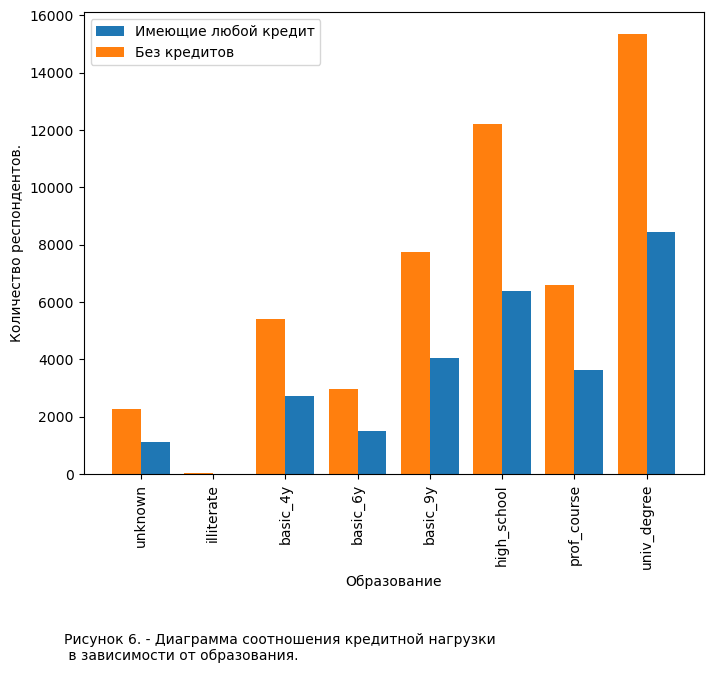

In [1876]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

width = 0.4
plt.bar(height=dfs.loc[True, :], x=dfs.columns, align='edge', width=width, 
        label='Имеющие любой кредит')
plt.bar(height=dfs.loc[False, :], x=dfs.columns, align='edge', width=-width, 
        label='Без кредитов')

plt.xticks(rotation='vertical')
plt.xlabel("Образование")
plt.ylabel("Количество респондентов.")
plt.legend()

plt.figtext(*FIG_TEXT_POS_XL, "Рисунок 6. \
- Диаграмма соотношения кредитной нагрузки \n в зависимости от образования.")

Наблюдается некая закономерность: независимо от образования закредитованность респондентов составляет порядка 30%.

### В зависимости от семейного статуса

In [1877]:
# Таблица сопряжённости Образование - Ипотечный кредит
dfh = pd.crosstab(index=df['housing'], columns=df['marital'])

In [1878]:
dfh

marital,married,single,divorced,unknown
housing,,,,
False,11389,5097,2092,44
True,12951,6191,2399,35


In [1879]:
dfl = pd.crosstab(index=df['loan'], columns=df['marital'])

In [1880]:
dfl

marital,married,single,divorced,unknown
loan,,,,
False,20567,9500,3816,67
True,3773,1788,675,12


In [1881]:
dfs = dfh + dfl
dfs

marital,married,single,divorced,unknown
housing,,,,
False,31956,14597,5908,111
True,16724,7979,3074,47


Text(0.1, -0.2, 'Рисунок 7. - Диаграмма соотношения кредитной нагрузки \n в зависимости от семейного положения.')

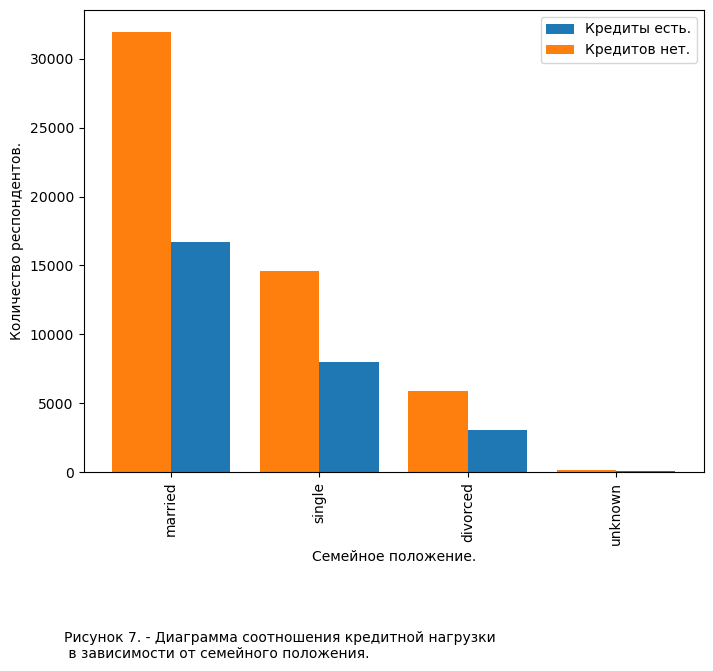

In [1882]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)
width = 0.4
plt.bar(x=dfs.columns, height=dfs.loc[True, :], width=width, align='edge', 
        label="Кредиты есть.")
plt.bar(x=dfs.columns, height=dfs.loc[False, :], width=-width, align='edge', 
        label="Кредитов нет.")
plt.xlabel("Семейное положение.")
plt.ylabel("Количество респондентов.")
plt.xticks(rotation='vertical')
plt.legend()
plt.figtext(*FIG_TEXT_POS_XL, "Рисунок 7. \
- Диаграмма соотношения кредитной нагрузки \
\n в зависимости от семейного положения.")

Видна некоторая закономерность: общая закредитованность респондентов в разрезе семейного положения (имеется хотя бы один кредит) стоставляет порядка 30% от от общего числа людей попавших в маркетинговую компанию, что означает наличие большого потенциального рынка.

## Зависимость заключения договора

### "Ящик с усами" в разрезе числа контактов с респондентом в текущей маркетинговой компании.

In [1883]:
# Датафреймы (в данном случае серии) тех кто заключил и не заключил контакт.
accepted = df.loc[(df['is_success']) & (df['contacts'] > 0), 'contacts']
rejected = df.loc[(~df['is_success']) & (df['contacts'] > 0), 'contacts']

Text(0.1, -0.05, 'Рисунок 8. - Диаграммы количества контактов с респондентами \n            (в рамках текущей маркетинговой компании)\n            заключившими и не заключившими договор обслуживания.')

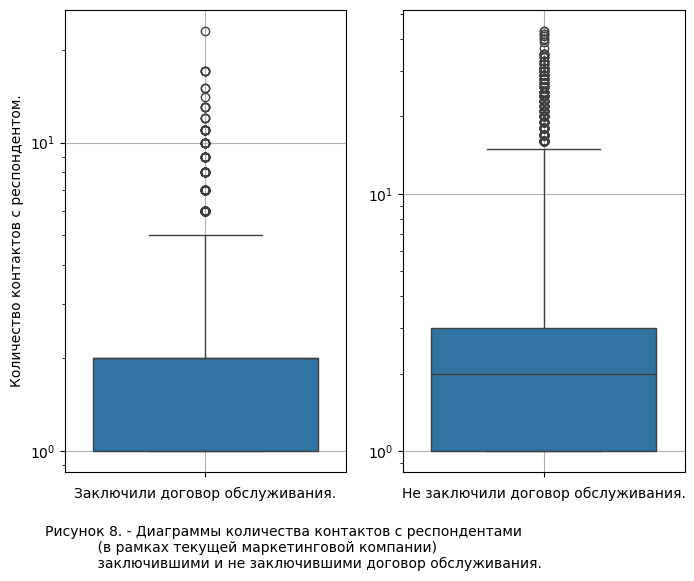

In [1884]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
sns.boxplot (data=accepted, log_scale=[False, True])
plt.grid()

plt.ylabel("Количество контактов с респондентом.")
plt.xlabel("Заключили договор обслуживания.")

plt.subplot(1, 2, 2)
sns.boxplot (data=rejected, log_scale=[False, True])

plt.grid()

plt.ylabel("")
plt.xlabel("Не заключили договор обслуживания.")
plt.figtext(*FIG_TEXT_POS, 
            "Рисунок 8. - Диаграммы количества контактов с респондентами \n\
            (в рамках текущей маркетинговой компании)\n\
            заключившими и не заключившими договор обслуживания.")

Как видно из диаграммы, межквартильный размах в обеих случаях находится в рамках одного - двух контактов. Так же можно сказать, что 75% респондентов заключают договор обслуживания после первого контакта или отказывают после двух.

А сколько максимально контактов нужно на одного респондента, чтобы договор заключили 95% респондентов?

Проверка, путём корректировки усов графика.

Text(0.1, -0.05, 'Рисунок 9. - Диаграммы количества контактов с респондентами \n(в рамках текущей маркетинговой компании)\nзаключившими (95%) и не заключившими (95%) договор обслуживания')

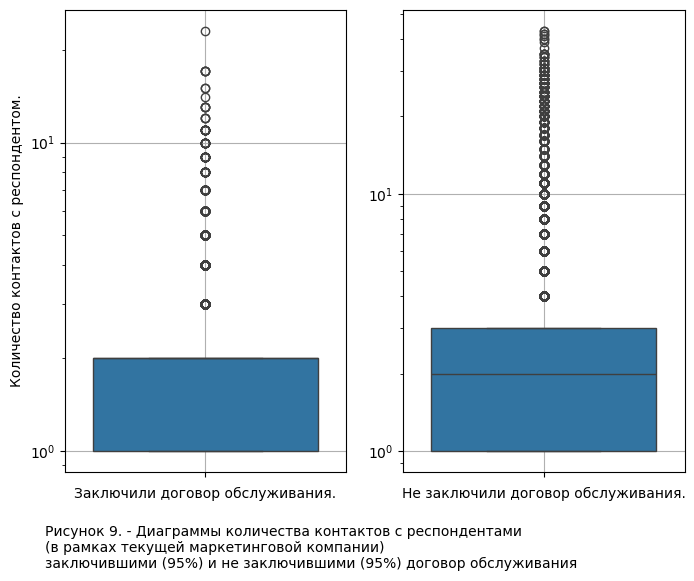

In [1885]:
plt.figure(figsize=FIG_SIZE)

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
sns.boxplot (data=accepted, log_scale=[False, True], whis=[0.0, 0.95])
plt.grid()

plt.ylabel("Количество контактов с респондентом.")
plt.xlabel("Заключили договор обслуживания.")

plt.subplot(1, 2, 2)
sns.boxplot (data=rejected, log_scale=[False, True], whis=[0.0, 0.95])

plt.grid()

plt.ylabel("")
plt.xlabel("Не заключили договор обслуживания.")
plt.figtext(*FIG_TEXT_POS, 
            "Рисунок 9. - Диаграммы количества контактов с респондентами \n\
(в рамках текущей маркетинговой компании)\n\
заключившими (95%) и не заключившими (95%) договор обслуживания")

Усы просто исчезли. Это означает, что **95% определяются "заключать или не заключать договор" за два контакта** с сотрудником банка во время текущей маркетинговой компании.

### "Ящик с усами" в разрезе общего числа контактов с респондентом
(суммарно в данной маркетинговой компании и в прошлой)

In [1886]:
#----------------------------------------------------------------------------80
accepted = df.loc[
        (df['is_success']) & ((df['contacts'] > 0) | (df['p_contacts'] > 0)), 
        ['contacts', 'p_contacts']
    ].sum(axis='columns')
accepted

75       1
83       1
88       1
129      1
139      1
        ..
41174    7
41178    5
41181    1
41183    1
41186    1
Length: 4533, dtype: int64

In [1887]:
rejected = df.loc[
        ( ~df['is_success']) & ((df['contacts'] > 0) | (df['p_contacts'] > 0)), 
        ['contacts', 'p_contacts']
    ].sum(axis='columns')
rejected

0        1
1        1
2        1
3        1
4        1
        ..
41180    2
41182    2
41184    1
41185    2
41187    4
Length: 35665, dtype: int64

Text(0.1, -0.05, 'Рисунок 10. - Диаграмма соотношения количества контактов \n            (суммарно по данной и прошлой маркетинговым компаниям) \n             заключивших и не заключивших договор обслуживания')

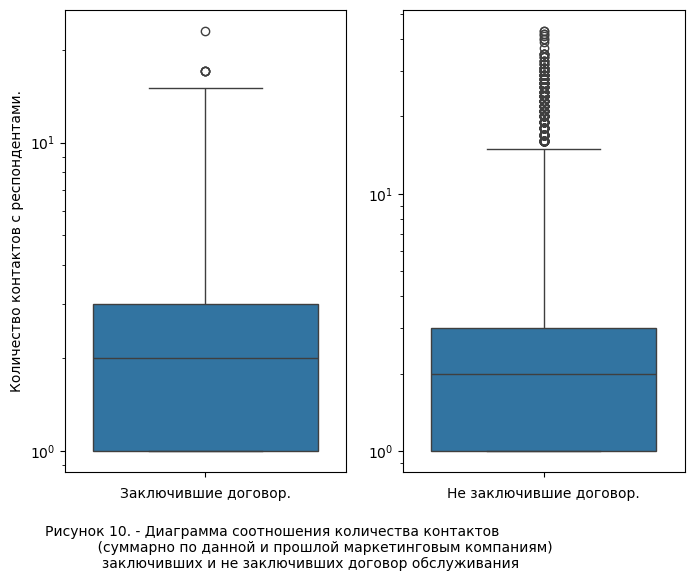

In [1888]:
plt.figure(figsize=FIG_SIZE)

plt.subplot(1, 2, 1)
sns.boxplot(data=accepted, log_scale=[False, True])
plt.xlabel("Заключившие договор.")
plt.ylabel("Количество контактов с респондентами.")

plt.subplot(1, 2, 2)
sns.boxplot(data=rejected, log_scale=[False, True])
plt.xlabel("Не заключившие договор.")

plt.figtext(*FIG_TEXT_POS, 
            "Рисунок 10. - Диаграмма соотношения количества контактов \n\
            (суммарно по данной и прошлой маркетинговым компаниям) \n \
            заключивших и не заключивших договор обслуживания")

Как видно из этой диаграммы, межквартильный размах в обеих случаях находится в рамках одного - трёх контактов. Так же можно сказать, что 50% респондентов заключают договор обслуживания после трёх контактов.

В целом можно смело утверждать, **если респондент отказал банку после шести-семи телефонных звонков за две последовательные маркетинговые компании, то далее тратить на него время бессмысленно**, и следует перекинуть усилия сотрудников на другие направления деятельности.

### Карта температур в зависимости от месяца и дня недели последнего контакта.

In [1889]:
# Создание таблицы сопряжённости
# Значения в таблице создаются типа object (почему-то?), 
# поэтому, принудительно меняем на тип integer.
accepted = pd.crosstab(
    index=df['day_of_week'], 
    columns=df['month'], 
    values=df.loc[df['is_success'], 'is_success'], 
    aggfunc='sum').astype(int)

Text(0.1, -0.2, 'Рисунок 11. - Температурная карта заключения депозитных договоров \n            в зависимости от дня недели и месяца.')

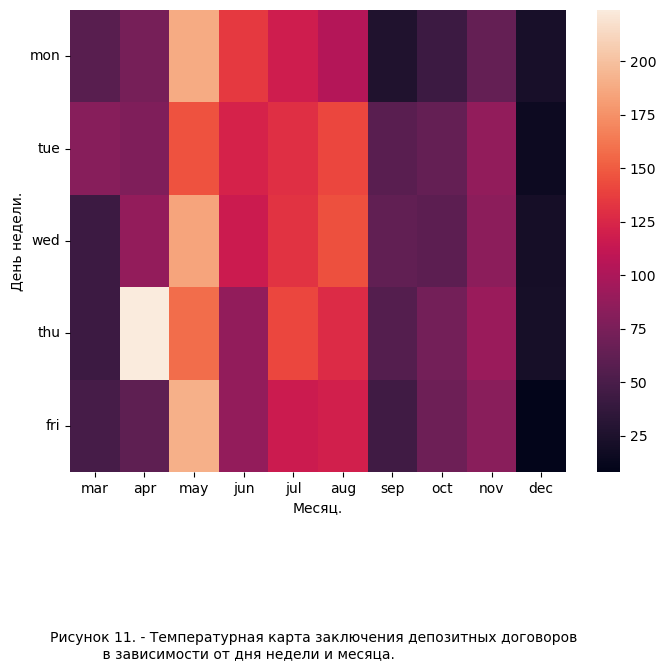

In [1890]:
plt.figure(figsize=FIG_SIZE)
sns.heatmap(data=accepted)
plt.yticks(rotation='horizontal')
plt.ylabel("День недели.")
plt.xlabel("Месяц.")
plt.figtext(*FIG_TEXT_POS_XL,
            "Рисунок 11. - Температурная карта заключения депозитных договоров \n\
            в зависимости от дня недели и месяца.")

На данной диаграмме температур видно:
1. Начало маркетинговой компании (март-апрель) было достаточно вялым. Возможно эти два месяца респонденты "раскачивались". Либо, после новогодних праздников у людей просто закончились деньги.
2. Интересным фактом является скачок продаж по четвергам в апреле. К сожалению, для исследования данного факта мало данных: возможно это просто локальный выброс, возможно все четвреги в апреле такие. Не понятно.
3. Общий рост продаж (заключения договоров) произошёл в мае. Видимо респонденты раскачались, созрели, и положительно отреагировали.
4. После мая пошёл явный спад до минимума в декабре. Возможно, после скачка в мае, пошёл постепенный добор остатков по респондентской базе.
5. Отчётливо видна граница август-сентябрь. Можно предположить, что либо:
   * люди вернулись без денег из отпусков - денег на депозит нет.
   * начало учебного года (подготовка и сбор детей в школы) - денег на депозит нет.

В разрезе дня недели выделить наиболее удачные для маркетинговой компании дни достаточно сложно - тенденции разнонаправленные.
В разрезе месяцев - считать бессмысленным проведение маркетинговых компаний с сентября и до марта-апреля следующего года.

### Карта температур в зависимости от количества контактов предшествовавших данной маркетинговой компании и длительностью паузы в общении до начала данной маркетинговой компании.

In [1891]:
# Таблица сопряжённости числа контактов и количества дней, 
# за вычетом тех респондентов, с которыми контактов не было.
accepted = pd.crosstab(
    index=df.loc[df['is_success'], 'p_contacts'], 
    columns=df.loc[df['is_success'], 'p_days'],
    values=df.loc[df['is_success'], 'is_success'],
    aggfunc='count'
).fillna(0).sort_index(ascending=False)
accepted

p_days,-1,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,21,22,25,26,27
p_contacts,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,7.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,2.0,14.0,1.0,0.0,8.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,2.0,2.0,2.0,34.0,5.0,3.0,44.0,6.0,2.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0,3.0,1.0,10.0,79.0,19.0,7.0,89.0,12.0,3.0,...,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
1,435.0,5.0,4.0,21.0,155.0,35.0,17.0,140.0,19.0,5.0,...,11.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
0,3078.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.1, -0.2, 'Рисунок 12.             - Температурная карта заключения депозитных договоров \n            в зависимости от числа контактов \n            во время предыдущей маркетинговой компании \n            и паузой между последним контактом во время предыдущей компании \n            и первым контактом во время текущей маркетинговой компанией.')

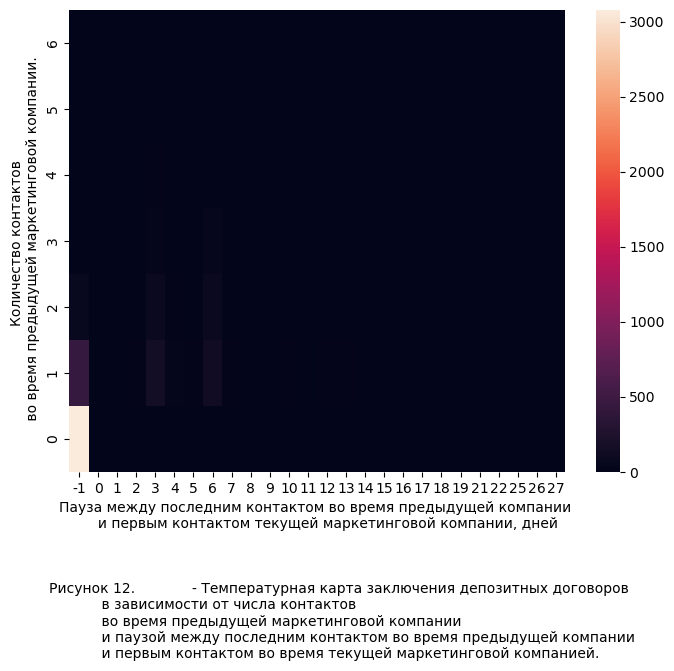

In [1892]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

sns.heatmap(data=accepted)
plt.ylabel(
    "Количество контактов \n во время предыдущей маркетинговой компании."
)
plt.xlabel(
    "Пауза между последним контактом во время предыдущей компании \n \
    и первым контактом текущей маркетинговой компании, дней")
plt.figtext(*FIG_TEXT_POS_XL,
            "Рисунок 12. \
            - Температурная карта заключения депозитных договоров \n\
            в зависимости от числа контактов \n\
            во время предыдущей маркетинговой компании \n\
            и паузой между последним контактом во время предыдущей компании \n\
            и первым контактом во время текущей маркетинговой компанией.")

На диаграмме видно влияние числа контактов во время предыдущей компании при следующих условиях:  
* число контактов во время предыдущей маркетинговой компании - от 1 до 3 включительно;
* пауза между последним контактом во время предыдущей компании и первым контактом во время текущей компаниями - 3 или 6 дней.

Можно сказать, что независимо от числа контактов во время предыдущей маркетинговой компании, если пауза между компаниями больше 6 дней, то эффект влияния предыдущей компании сбрасывается на ноль.

### Карту температур в зависимости от занятости и индекса потребительской уверенности.

In [1893]:
# Таблица сопряжённости между 
# Индексом потребительской уверенности и Занятостью.
accepted = pd.crosstab(
    index=df.loc[df['is_success'], 'cons_conf_idx_m'], 
    columns=df.loc[df['is_success'], 'nr_employed_q'], 
    values=df.loc[df['is_success'], 'is_success'], 
    aggfunc='sum').fillna(0)
accepted

nr_employed_q,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
cons_conf_idx_m,,,,,,,,,,,
-50.8,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-50.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,0.0,0.0,0.0,0.0
-49.5,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-47.1,0.0,0.0,0.0,0.0,0.0,0.0,429.0,0.0,0.0,0.0,0.0
-46.2,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,0.0,0.0
-45.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-42.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,402.0
-42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,0.0
-41.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185.0


Text(0.1, -0.2, 'Рисунок 13.             - Температурная карта заключения депозитных договоров \n            в зависимости от Индекса потребительской уверенности \n            и Занятости.')

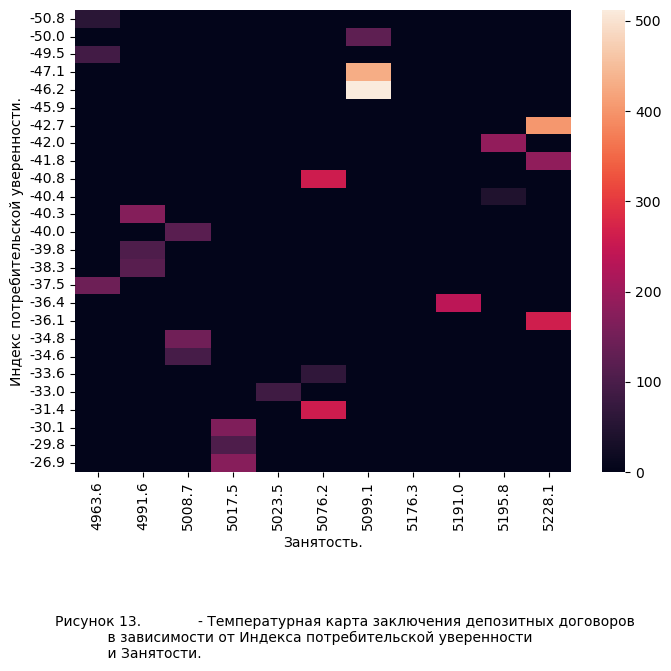

In [1894]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

sns.heatmap(data=accepted)
plt.xlabel("Занятость.")
plt.ylabel("Индекс потребительской уверенности.")

plt.figtext(*FIG_TEXT_POS_XL,
            "Рисунок 13. \
            - Температурная карта заключения депозитных договоров \n\
            в зависимости от Индекса потребительской уверенности \n\
            и Занятости.")

На диаграмме видно наличие тенденции по направлению "слева снизу" на "вправо вверх". То есть, чем выше занятость и индекс потребительской уверенности, тем больше договоров на размещение депозита можно заключить во время маркетинговой компании, что, впрочем, вполне понятно. То есть, проведение подобных маркетинговых компаний имеет тем больший выхлоп, чем выше эти экономические показатели.

## Выявление закономерностей

### Выявить наличие или отсутствие закономерности влияния длительности последнего разговора с респондентом на заключение депозитного договора.

In [1895]:
# Подготовка данных
dfc = pd.concat(
    [
        df['duration'], 
        pd.Series(
            index=df.index, 
            data=df['is_success'].apply(lambda v: 1 if v else 0), 
            name='success'),
        pd.Series(
            index=df.index, 
            data=df['is_success'].apply(lambda v: 0 if v else 1), 
            name='not_success')
    ], axis='columns')
# Матрица корреляций
dfc.corr()

,duration,success,not_success
duration,1.000000,0.405043,-0.405043
success,0.405043,1.000000,-1.000000
not_success,-0.405043,-1.000000,1.000000


Судя по матрице корелляций никакой взаимосвязи между длительностью последнего разговора и фактом заключения договора на размещение депозита **нет**.

### Выявить наличие или отсутствие закономерности влияния количества контактов с респондентом в данной маркетинговой компании на заключение депозитного договора.

In [1896]:
#----------------------------------------------------------------------------80
# Подготовка данных
dfc = pd.concat(
    [
        df['contacts'], 
        pd.Series(index=df.index, 
                  data=df['is_success'].apply(lambda v: 1 if v else 0), 
                  name='success'),
        pd.Series(index=df.index, 
                  data=df['is_success'].apply(lambda v: 0 if v else 1), 
                  name='not_success')
    ], axis='columns')
# Матрица корреляций
dfc.corr()

,contacts,success,not_success
contacts,1.000000,-0.065743,0.065743
success,-0.065743,1.000000,-1.000000
not_success,0.065743,-1.000000,1.000000


Аналогично, никакой связи между количеством контактов с респондентом и фактом заключения депозитного договора **не обнаружено**.

### Выявить наличие или отсутствие закономерности влияния количества предыщущих контактов (предшествовавших данной маркетинговой компании) с респондентом на заключение депозитного договора

In [1897]:
#----------------------------------------------------------------------------80
# Подготовка данных
dfc = pd.concat(
    [
        df['p_contacts'], 
        pd.Series(index=df.index, 
                  data=df['is_success'].apply(lambda v: 1 if v else 0), 
                  name='success'),
        pd.Series(index=df.index, 
                  data=df['is_success'].apply(lambda v: 0 if v else 1), 
                  name='not_success')
    ], axis='columns')
# Матрица корреляций
dfc.corr()

,p_contacts,success,not_success
p_contacts,1.000000,0.228633,-0.228633
success,0.228633,1.000000,-1.000000
not_success,-0.228633,-1.000000,1.000000


Аналогично, никакой связи между количеством контактов с респондентом в прошлой маркетинговой компании и фактом заключения депозитного договора в последней маркетинговой компании **не обнаружено**.

### Построить диаграмму рассеяния и посчитать корреляцию
между количеством заключённых договоров и Индексом потребительских цен.

In [1898]:
# Подготовка данных
dfc = pd.crosstab(index=df['is_success'], 
                  columns=df['cons_price_idx_m']).sort_index(ascending=False)
dfc

cons_price_idx_m,92.201,92.379,92.431,92.469,92.649,92.713,92.756,92.843,92.893,92.963,...,93.876,93.918,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.767
is_success,,,,,,,,,,,,,,,,,,,,,
True,258,104,175,65,165,85,1,124,512,258,...,119,402,237,116,105,143,170,185,89,57
False,492,159,260,109,183,81,9,152,5158,431,...,87,6147,7306,109,121,148,134,4043,108,70


Text(0.1, -0.05, 'Рисунок 14. - Количество открытых депозитов \n            в зависимости от Индекса потребительских цен.')

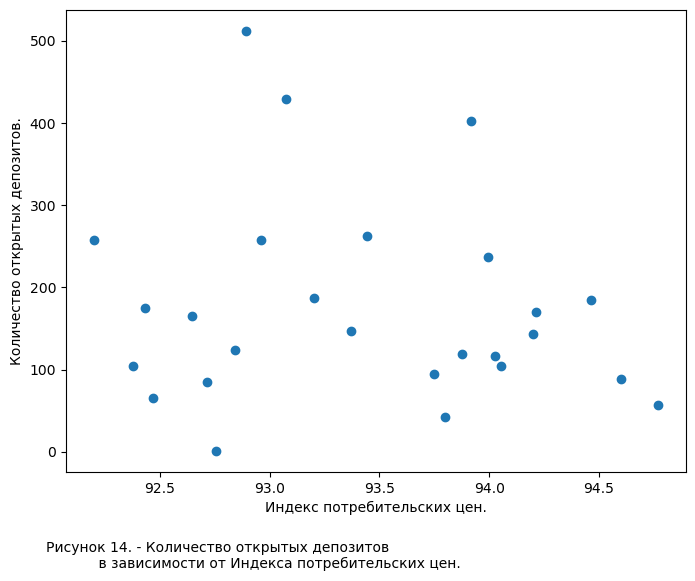

In [1899]:
# ИПЦ cons_price_idx_m
plt.figure(figsize=FIG_SIZE)

plt.scatter(x=dfc.columns, y=dfc.iloc[0])
plt.xlabel("Индекс потребительских цен.")
plt.ylabel("Количество открытых депозитов.")
plt.figtext(*FIG_TEXT_POS,
            "Рисунок 14. - Количество открытых депозитов \n\
            в зависимости от Индекса потребительских цен.")

In [1900]:
# Подготовка данных
dfc = dfc.T.reset_index().drop(columns=False)

In [1901]:
dfc.corr()

is_success,cons_price_idx_m,True
is_success,,
cons_price_idx_m,1.000000,-0.139128
True,-0.139128,1.000000


Кореляции межу Индексом потребительских цен и количеством заключённых договоров **не обнаружено**.

#  <a name="3">3. Составление структуры развития бизнеса в зависимости от образования респондентов.</a>

Распределение респондентов по образованию.

Text(0.1, -0.2, 'Рисунок 15. - Распределение общего количества \nреспондентов по образованию \n (все респонденты и респонденты заключившие договор с банком).')

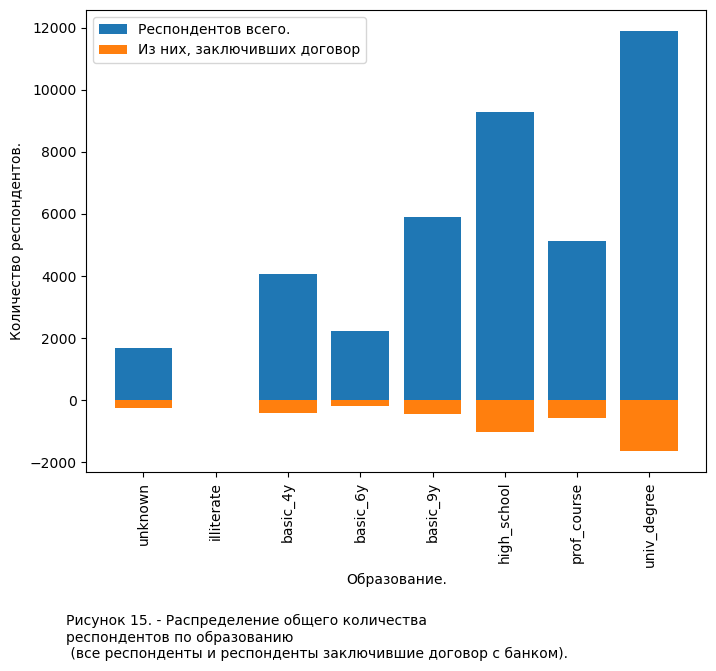

In [1902]:
##### ----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

plt.bar(
    x=df['education'].value_counts().sort_index().index, 
    height=df['education'].value_counts().sort_index(), 
    label="Респондентов всего."
)
plt.bar(
    x=df['education'].value_counts().sort_index().index, 
    height=df.loc[df['is_success'], 'education']\
        .value_counts().sort_index() * (-1), 
    label="Из них, заключивших договор"
)
plt.ylabel("Количество респондентов.")
plt.xlabel("Образование.")
plt.legend()
plt.xticks(rotation='vertical')
plt.figtext(*FIG_TEXT_POS_XL,
            "Рисунок 15. - Распределение общего количества \n\
респондентов по образованию \n (все респонденты \
и респонденты заключившие договор с банком).")

Как видно из гистограммы, самое большое абсолютное количество респондентов в маркетинговой компании приходится на образованных людей: старшая школа, проф. образование, университет.

In [1903]:
# Матрица сопряжённости факта заключения договора и образования респондента.
dfe = pd.crosstab(index=df['is_success'], 
                  columns=df['education'], 
                  normalize='columns')
dfe = dfe.T.rename(columns={True: 'success', False: 'not_success'}).T
dfe

education,unknown,illiterate,basic_4y,basic_6y,basic_9y,high_school,prof_course,univ_degree
is_success,,,,,,,,
not_success,0.854524,0.777778,0.897265,0.918907,0.921955,0.891339,0.88687,0.862417
success,0.145476,0.222222,0.102735,0.081093,0.078045,0.108661,0.11313,0.137583


Text(0.1, -0.2, 'Рисунок 16. - Соотношение заключивших договор с банком \n            и не заключивших договор с разбивкой по образованию.')

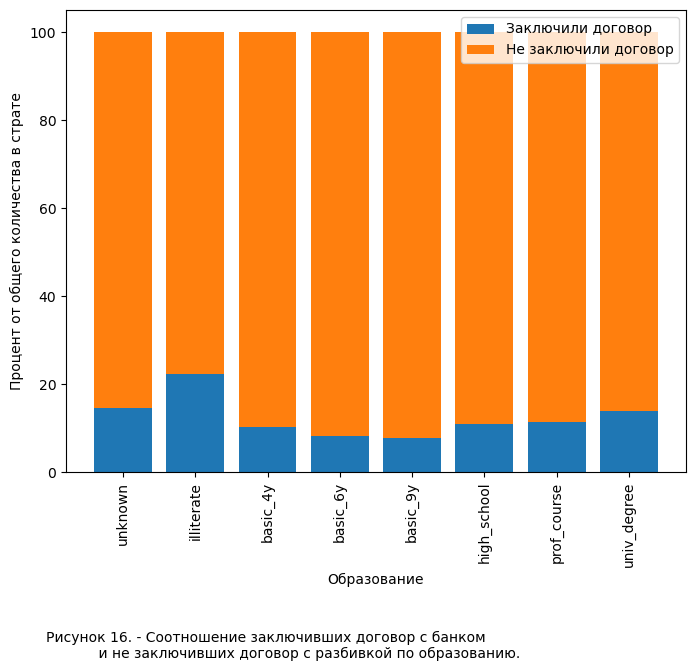

In [1904]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)

plt.bar(x=dfe.columns, height=dfe.loc['success', :] * 100, 
        label="Заключили договор", bottom=np.zeros(len(dfe.columns)))
plt.bar(x=dfe.columns, height=dfe.loc['not_success', :] * 100, 
        label="Не заключили договор", bottom=dfe.loc['success', :] * 100)

plt.xlabel("Образование")
plt.ylabel("Процент от общего количества в страте")
plt.xticks(rotation='vertical')
plt.legend()

plt.figtext(*FIG_TEXT_POS_XL,
            "Рисунок 16. - Соотношение заключивших договор с банком \n\
            и не заключивших договор с разбивкой по образованию.")

Как видно из диаграммы, люди без образования охотнее всего заключают договор банковского депозита.

Итак:
1. На данный момент, с ростом образования в данных растёт и количество респондентов в соответствующих стратах (что несомненно является правильной бизнес-стратегией, см. *рис. 15*). Тем не менее, процентное соотношение заключивших договор с банком держится на уровне 8-15% в каждой страте (см. *рис. 16*). Возможно имеет смысл сосредоточиться на высокообразованных респондентах, где людей без кредитов (в абсолютных значениях) значительно больше чем в других стратах (см. *рис. 6*)? Люди без кредитов с высоким образованием представляют интерес как для получения кредита, так и с точки зрения привнесения депозита в банк. Необходимо разработать:
   * специальные кредитные предложения для образованных и высокго образованных людей;
   * специальные депозитные условия для них же.
3. Для углубления сотрудничества с высокообразованными респондентами возможно использовать сотрудников, высвобождающихся от чрезмерных звонков.

#  <a name="4"> 4. Исследование статистических показателей зависимости факта заключения депозитного договора от общего количества контактов с респондентом.</a>

Построить линейную регрессию зависимости между заключением депозитного договора и средней длительностью последнего разговора с респондентом

In [1905]:
#----------------------------------------------------------------------------80
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
# from sklearn.ensemble import RandomForestClassifier

## Подготовка данных

### Кодирование категориальных данных

In [1906]:
# Имена столбцов с категорийными данными
text_categor_cols = [
    'job', 'marital', 'education', 'default', 'housing', 
    'loan', 'phone_or_cell', 'p_outcome', 'is_success', 'month', 'day_of_week']

# Имена колонок с числовыми данными.
numeric_cols = [*(set(df.columns) - set(text_categor_cols))]
numeric_cols

['euribor_3m',
 'contacts',
 'emp_var_rate_q',
 'cons_conf_idx_m',
 'cons_price_idx_m',
 'nr_employed_q',
 'age',
 'p_days',
 'p_contacts',
 'duration']

In [1907]:
# Разворачиваение категориальных данных в наборы "фиктивных" признаков.
df_categorized = pd.get_dummies(df, columns=text_categor_cols, drop_first=True)

df_categorized.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
duration,261,149,226,151,307
contacts,1,1,1,1,1
p_days,-1,-1,-1,-1,-1
p_contacts,0,0,0,0,0
emp_var_rate_q,1.1,1.1,1.1,1.1,1.1
cons_price_idx_m,93.994,93.994,93.994,93.994,93.994
cons_conf_idx_m,-36.4,-36.4,-36.4,-36.4,-36.4
euribor_3m,4.857,4.857,4.857,4.857,4.857
nr_employed_q,5191.0,5191.0,5191.0,5191.0,5191.0


In [1908]:
df_categorized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40198 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40198 non-null  int64  
 1   duration                 40198 non-null  int64  
 2   contacts                 40198 non-null  int64  
 3   p_days                   40198 non-null  int64  
 4   p_contacts               40198 non-null  int64  
 5   emp_var_rate_q           40198 non-null  float64
 6   cons_price_idx_m         40198 non-null  float64
 7   cons_conf_idx_m          40198 non-null  float64
 8   euribor_3m               40198 non-null  float64
 9   nr_employed_q            40198 non-null  float64
 10  job_services             40198 non-null  bool   
 11  job_admin                40198 non-null  bool   
 12  job_blue-collar          40198 non-null  bool   
 13  job_technician           40198 non-null  bool   
 14  job_retired              40

Text(0.1, -0.05, 'Рисунок 17. - Гистограмма частоты появления числовых значений в данных.')

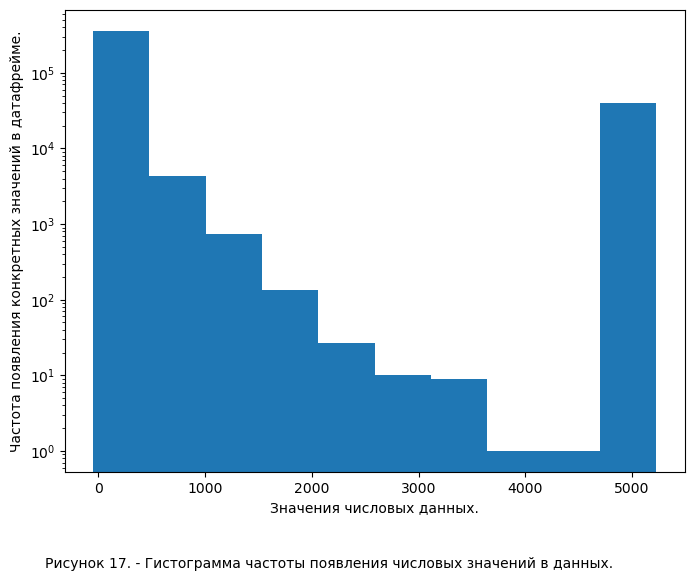

In [1909]:
plt.figure(figsize=FIG_SIZE)
plt.hist(x=df_categorized[numeric_cols].values.flatten(), log=True)

plt.xlabel('Значения числовых данных.')
plt.ylabel('Частота появления конкретных значений в датафрейме.')
plt.figtext(*FIG_TEXT_POS, "Рисунок 17. \
- Гистограмма частоты появления числовых значений в данных.")

Гистограмма говорит, что диапазон числовых данных простирается от отрицательных чисел около нуля, до более чем 5000. Это говорит, что данные нуждаются в стандартизации (масштабировании), то есть приведении к одному усреднённому диапазону.

### Масштабирование признаков

In [1910]:
df_scaled = df_categorized.copy()

scaler = StandardScaler()
scaler.fit(df_scaled[numeric_cols])

StandardScaler()

In [1911]:
df_scaled[numeric_cols] = scaler.transform(df_scaled[numeric_cols])

Text(0.1, -0.05, 'Рисунок 18. - Гистограмма частоты появления числовых значений в данных после стандартизации.')

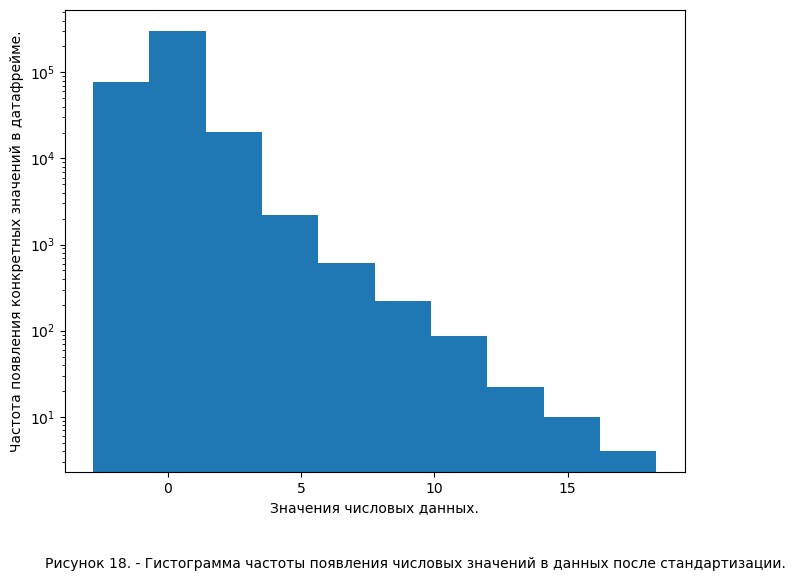

In [1912]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)
plt.hist(x=df_scaled[numeric_cols].values.flatten(), log=True)

plt.xlabel('Значения числовых данных.')
plt.ylabel('Частота появления конкретных значений в датафрейме.')
plt.figtext(*FIG_TEXT_POS, "Рисунок 18. \
- Гистограмма частоты появления числовых значений \
в данных после стандартизации.")

In [1913]:
# Матрица корреляции стандартизированных признаков.
df_scaled.corr().head(5).T

,age,duration,contacts,p_days,p_contacts
age,1.000000,-0.000134,0.004619,0.020839,0.025081
duration,-0.000134,1.000000,-0.071448,0.048311,0.019363
contacts,0.004619,-0.071448,1.000000,-0.043741,-0.079599
p_days,0.020839,0.048311,-0.043741,1.000000,0.505201
p_contacts,0.025081,0.019363,-0.079599,0.505201,1.000000
emp_var_rate_q,-0.000962,-0.026801,0.151611,-0.229437,-0.420353
cons_price_idx_m,0.000714,0.006366,0.128957,-0.047627,-0.204167
cons_conf_idx_m,0.129586,-0.008635,-0.014300,0.069215,-0.050569
euribor_3m,0.010230,-0.031273,0.135940,-0.261721,-0.453702
nr_employed_q,-0.018346,-0.042943,0.144974,-0.334318,-0.499793


Text(0.1, -0.2, 'Рисунок 19. - Температурная карта матрицы корреляции данных.')

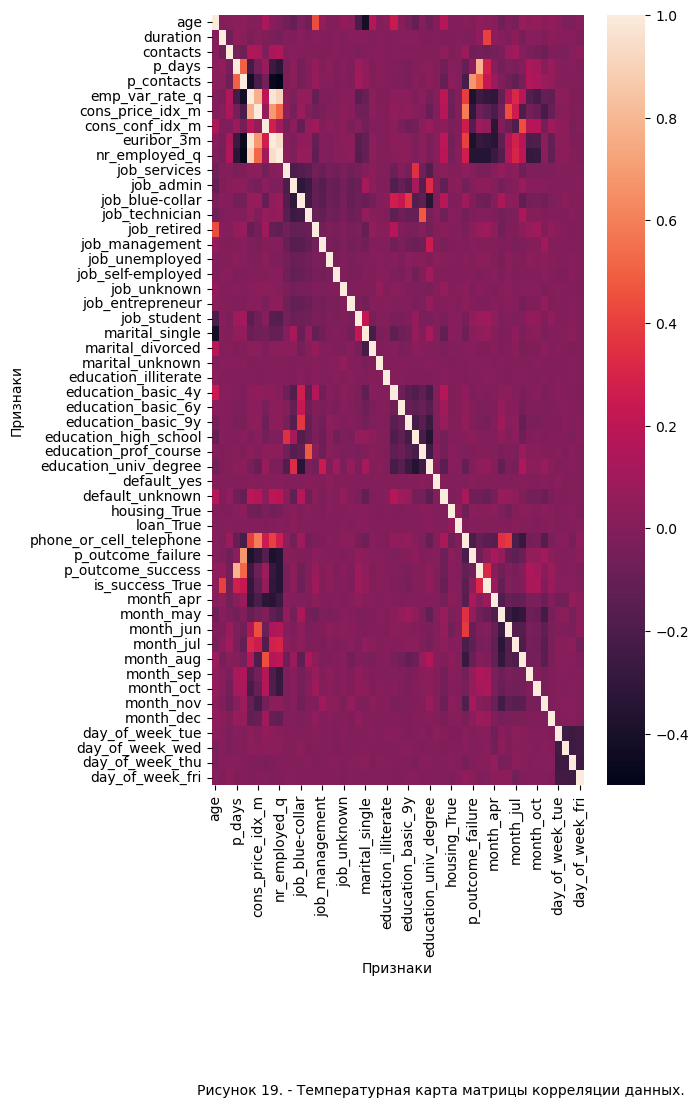

In [1914]:
plt.figure(figsize=(6, 10))

sns.heatmap(data=df_scaled.corr())

plt.ylabel("Признаки")
plt.xlabel("Признаки")
plt.figtext(*FIG_TEXT_POS_XL, "Рисунок 19. \
- Температурная карта матрицы корреляции данных.")

Видно, что у поля `is_success_True` очень слабые корреляции с другими полями, что уже не внушает оптимизма.

### Разделение на выборки

In [1915]:
# Разбиение данных на тренировочные и тестовые
train, test = train_test_split(df_scaled, test_size=0.25, random_state=12345)

# Тренировочные данные по осям
train_x = train.drop(columns='is_success_True')
train_y = train['is_success_True']
# Тестовые данные по осям
test_x = test.drop(columns='is_success_True')
test_y = test['is_success_True']

## Регрессионный анализ

### Логистическая регрессия

In [1916]:
df['is_success'].value_counts()

is_success
False    35665
True      4533
Name: count, dtype: int64

Число заключений договоров составляет около 10% от общего количества респондентов. То есть, данные сильно несбалансированы. Необходимо укзать параметр балансировки `class_weight='balanced'`

In [1917]:
#----------------------------------------------------------------------------80
#instantiate the model
log_regression = linear_model.LogisticRegression(random_state=12345, 
                                                 max_iter=200, 
                                                 class_weight='balanced')
log_regression

LogisticRegression(class_weight='balanced', max_iter=200, random_state=12345)

In [1918]:
#fit the model using the training data
log_regression. fit (train_x, train_y)

#use model to make predictions on test data
y_pred = log_regression. predict (test_x)

In [1919]:
# Предсказанные данные.
pd.Series(y_pred).value_counts()

False    7761
True     2289
Name: count, dtype: int64

In [1920]:
# Точность предсказания
print(accuracy_score(test_y, y_pred))

0.8607960199004975


In [1921]:
# Точность модели на нулевом входе
print(accuracy_score(test_y, np.zeros_like(test_y)))

0.8843781094527363


In [1922]:
# Точность модели на единицах
print(accuracy_score(test_y, np.ones_like(test_y)))

0.11562189054726368


In [1923]:
# Матрица неточности.
cmx = confusion_matrix(test_y, y_pred)
cmx = pd.DataFrame(cmx)
cmx.index.name, cmx.columns.name = 'fact', 'prediction'
cmx

prediction,0,1
fact,,
0,7625,1263
1,136,1026


Text(0.1, -0.05, 'Рисунок 20. - Логистическая регрессия. \n Классификация предсказанная моделью \nс разбивкой по классам.')

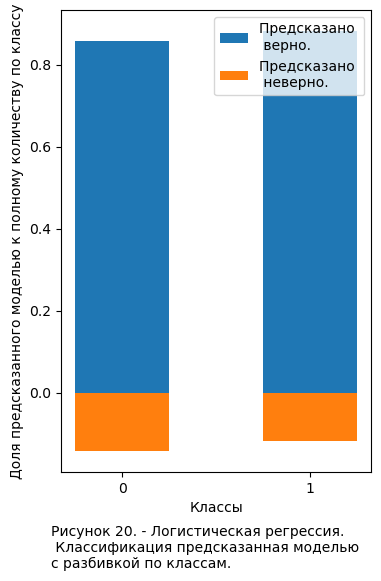

In [1924]:
## ----------------------------------------------------------------------------80
plt.figure(figsize=(FIG_SIZE[0]/2, FIG_SIZE[1]))

plt.bar(x=cmx.columns.values, 
        height=[
            cmx.iloc[0, 0]/cmx.iloc[0, :].sum(), 
            cmx.iloc[1, 1]/cmx.iloc[1, :].sum()
        ], 
        width=0.5, 
        label="Предсказано \n верно.")
plt.bar(x=cmx.columns.values, 
        height=[
            -cmx.iloc[0, 1]/cmx.iloc[0, :].sum(), 
            -cmx.iloc[1, 0]/cmx.iloc[1, :].sum()], 
        width=0.5, 
        label="Предсказано \n неверно.")

plt.xticks([0, 1])
plt.ylabel("Доля предсказанного моделью к полному количеству по классу")
plt.xlabel("Классы")
plt.legend()
plt.figtext(*FIG_TEXT_POS, "Рисунок 20. \
- Логистическая регрессия. \n Классификация предсказанная моделью \n\
с разбивкой по классам.")

Видно, что модель очень хорошо определяет отказавшихся от заключения договора и плохо согласившихся заключить договор.

In [1925]:
#----------------------------------------------------------------------------80
recall = recall_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно\
всех реально положительных решений:\n {recall}")

Доля реально положительных решений предсказанных моделью относительновсех реально положительных решений:
 0.882960413080895


In [1926]:
precision = precision_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно\
всех, которые модель посчитала положительными:\n {precision}")

Доля реально положительных решений предсказанных моделью относительновсех, которые модель посчитала положительными:
 0.44823066841415465


In [1927]:
f1 = f1_score(test_y, y_pred)
print(f"F1-мера: {f1}")

F1-мера: 0.594610257896262


In [1928]:
metrics = {'lr': (recall, precision, f1)}

### Решающее дерево

In [1929]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10, 
                               class_weight='balanced')

model.fit(train_x, train_y)

y_pred = model.predict(test_x)

In [1930]:
pd.Series(y_pred).value_counts()

False    7746
True     2304
Name: count, dtype: int64

In [1931]:
print(accuracy_score(test_y, y_pred))

0.8545273631840796


In [1932]:
print(accuracy_score(test_y, np.zeros_like(test_y)))

0.8843781094527363


In [1933]:
cmx = confusion_matrix(test_y, y_pred)
cmx = pd.DataFrame(cmx)
cmx.index.name, cmx.columns.name = 'fact', 'prediction'
cmx

prediction,0,1
fact,,
0,7586,1302
1,160,1002


Text(0.1, -0.05, 'Рисунок 21. - Решающее дерево. \n Классификация предсказанная моделью \nс разбивкой по классам.')

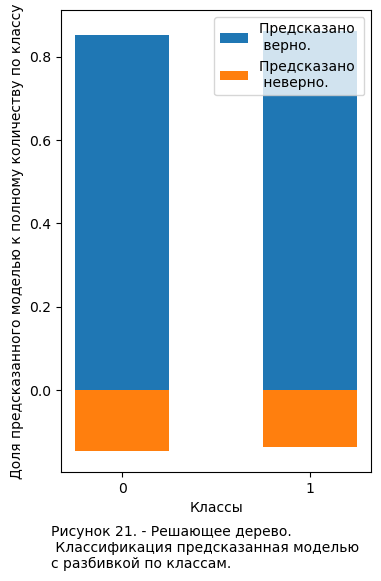

In [1934]:
#----------------------------------------------------------------------------80
plt.figure(figsize=(FIG_SIZE[0]/2, FIG_SIZE[1]))

plt.bar(x=cmx.columns.values, 
        height=[
            cmx.iloc[0, 0]/cmx.iloc[0, :].sum(), 
            cmx.iloc[1, 1]/cmx.iloc[1, :].sum()
        ], 
        width=0.5, 
        label="Предсказано \n верно.")
plt.bar(x=cmx.columns.values, 
        height=[
            -cmx.iloc[0, 1]/cmx.iloc[0, :].sum(), 
            -cmx.iloc[1, 0]/cmx.iloc[1, :].sum()
        ], 
        width=0.5, 
        label="Предсказано \n неверно.")

plt.xticks([0, 1])
plt.ylabel("Доля предсказанного моделью к полному количеству по классу")
plt.xlabel("Классы")
plt.legend()
plt.figtext(*FIG_TEXT_POS, "Рисунок 21. \
- Решающее дерево. \n Классификация предсказанная моделью \n\
с разбивкой по классам.")

Видно, что модель очень хорошо определяет отказавшихся от заключения договора и плохо согласившихся заключить договор.

In [1935]:
recall = recall_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно\
всех реально положительных решений:\n {recall}")

Доля реально положительных решений предсказанных моделью относительновсех реально положительных решений:
 0.8623063683304647


In [1936]:
#----------------------------------------------------------------------------80
precision = precision_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно\
всех, которые модель посчитала положительными:\n {precision}")

Доля реально положительных решений предсказанных моделью относительновсех, которые модель посчитала положительными:
 0.4348958333333333


In [1937]:
f1 = f1_score(test_y, y_pred)
print(f"F1-мера: {f1}")

F1-мера: 0.5781881130986728


In [1938]:
metrics['dt'] = (recall, precision, f1)

### Случайный лес

In [1939]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, 
                               class_weight='balanced')
model.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=40,
                       random_state=12345)

In [1940]:
y_pred = model.predict(test_x)
model.score(test_x, test_y)

0.9075621890547264

In [1941]:
pd.Series(y_pred).value_counts()

False    9353
True      697
Name: count, dtype: int64

In [1942]:
cmx = confusion_matrix(test_y, y_pred)
cmx = pd.DataFrame(cmx)
cmx.index.name, cmx.columns.name = 'fact', 'prediction'
cmx

prediction,0,1
fact,,
0,8656,232
1,697,465


Text(0.1, -0.05, 'Рисунок 22. - Случайный лес. \n Классификация предсказанная моделью \nс разбивкой по классам.')

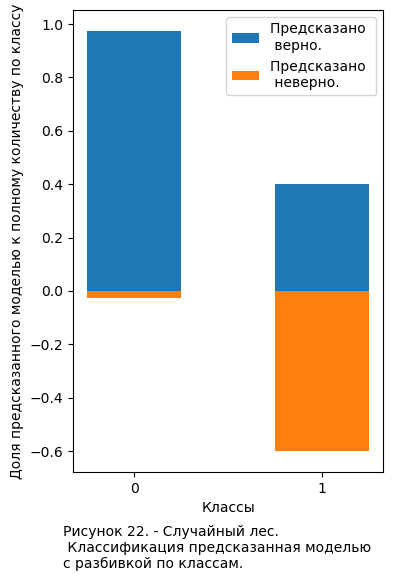

In [1943]:
#----------------------------------------------------------------------------80
plt.figure(figsize=(FIG_SIZE[0]/2, FIG_SIZE[1]))

plt.bar(x=cmx.columns.values, 
        height=[
            cmx.iloc[0, 0]/cmx.iloc[0, :].sum(), 
            cmx.iloc[1, 1]/cmx.iloc[1, :].sum()
        ], 
        width=0.5, 
        label="Предсказано \n верно.")
plt.bar(x=cmx.columns.values, 
        height=[
            -cmx.iloc[0, 1]/cmx.iloc[0, :].sum(), 
            -cmx.iloc[1, 0]/cmx.iloc[1, :].sum()
        ], 
        width=0.5, 
        label="Предсказано \n неверно.")

plt.xticks([0, 1])
plt.ylabel("Доля предсказанного моделью к полному количеству по классу")
plt.xlabel("Классы")
plt.legend()
plt.figtext(*FIG_TEXT_POS, "Рисунок 22. \
- Случайный лес. \n Классификация предсказанная моделью \n\
с разбивкой по классам.")

Видно, что модель очень хорошо определяет отказавшихся от заключения договора и плохо согласившихся заключить договор.

In [1944]:
recall = recall_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно всех реально положительных решений:\n {recall}")

Доля реально положительных решений предсказанных моделью относительно всех реально положительных решений:
 0.40017211703958694


In [1945]:
#----------------------------------------------------------------------------80
precision = precision_score(test_y, y_pred)
print(f"Доля реально положительных решений предсказанных моделью относительно\
всех, которые модель посчитала положительными:\n {precision}")

Доля реально положительных решений предсказанных моделью относительновсех, которые модель посчитала положительными:
 0.667144906743185


In [1946]:
f1 = f1_score(test_y, y_pred)
print(f"F1-мера: {f1}")

F1-мера: 0.5002689618074233


In [1947]:
metrics['rf'] = (recall, precision, f1)

## Выводы регрессионного анализа

Text(0.1, -0.05, 'Рисунок 23.             - Соотношение точности, полноты и F1-мер \n            по всем проведённым регрессионным исследованиям.')

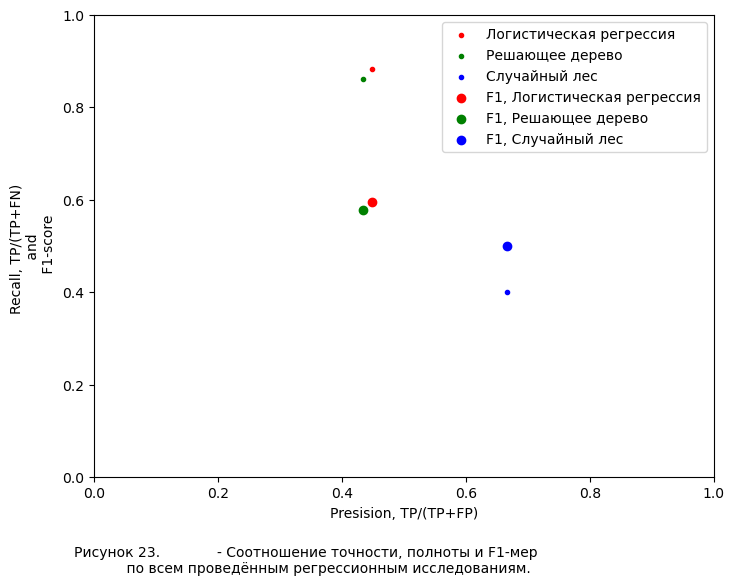

In [1948]:
#----------------------------------------------------------------------------80
plt.figure(figsize=FIG_SIZE)
plt.scatter(*metrics['lr'][-2::-1], label="Логистическая регрессия", 
            marker='.', c='r')
plt.scatter(*metrics['dt'][-2::-1], label="Решающее дерево", 
            marker='.', c='g')
plt.scatter(*metrics['rf'][-2::-1], label="Случайный лес", 
            marker='.', c='b')

plt.scatter(*metrics['lr'][1:], label="F1, Логистическая регрессия", c='r')
plt.scatter(*metrics['dt'][1:], label="F1, Решающее дерево", c='g')
plt.scatter(*metrics['rf'][1:], label="F1, Случайный лес", c='b')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Presision, TP/(TP+FP)')
plt.ylabel('Recall, TP/(TP+FN) \n and \n F1-score')
plt.legend()
plt.figtext(*FIG_TEXT_POS,
            "Рисунок 23. \
            - Соотношение точности, полноты и F1-мер \n\
            по всем проведённым регрессионным исследованиям.")

В результате исследования получено два классам моделей: на основе логистической регрессии и решающего дерева, и на основе случайного леса.  

Какие модели выбрать? 

Все модели очень хорошо определяют отказавшихся от заключения договора и плохо согласившихся. Это связано, скорее всего, со значительным превалированием в данных тех кто отказался.

Если стоит задача пропустить минимум заключающих договор обслуживания, то лучше выбрать модели на основе логистической регрессии или решающего дерева (у них меньшее число ложно отрицательных срабатываний (FN).  

Если необходимо сэкономить время сотрудников (при их нехватке например), то лучше воспользоваться моделью на основе случайного леса, так как у неё меньше ложно положительных предсказаний (сотрудники не будут впустую общаться с бесперспективными респондентами).  

В далнейшем, возможно, следует провести downgrade в данных по отказавшимся, чтобы лучше сбалансировать данных.

#  <a name="5">5. Проверка гипотез </a>

* $H_0$: Среднее количество контактов с респондентом не заключившим депозитный договор **равна** среднему количеству контактов с респондентом заключившим депозитный договор.
* $H_1$: Среднее количество контактов с респондентом не заключившим депозитный договор **не равно** среднему количеству контактов с респондентом заключившим депозитный договор.
* Самостоятельно сформулировать и проверить гипотезу
* Задать самостоятельно пороговое значение *alpha*.

In [1949]:
import scipy.stats as stats

alpha = 0.05

In [1950]:
#----------------------------------------------------------------------------80
# Отбор двух необходимых столбцов
grouped = df[['contacts', 'is_success']].copy()
# Группировка столбцов по количеству контактов.
grouped = pd.DataFrame(
    grouped[['contacts', 'is_success']]
        .groupby(by='contacts')['is_success'].count())
# Добавляем столбец числа контактов приведших к договору
grouped = pd.merge(
    left=grouped, 
    right=df.loc[df['is_success'], ['contacts', 'is_success']]
        .groupby(by='contacts')['is_success'].count(), 
    how='left',
    on='contacts').rename(
        columns={'is_success_x': 'is_success', 'is_success_y': 'true'}
        )
# Добавление столбца числа контактов не приведших к договору.
grouped = pd.merge(
    left=grouped, 
    right=df.loc[~df['is_success'], ['contacts', 'is_success']]
        .groupby(by='contacts')['is_success'].count(), 
    how='left',
    on='contacts').rename(
        columns={'is_success_x': 'all', 'is_success_y': 'false'}
        ).fillna(0)

print(grouped.head(5))

            all    true  false
contacts                      
1         17227  2240.0  14987
2         10305  1183.0   9122
3          5204   561.0   4643
4          2586   248.0   2338
5          1571   118.0   1453


Text(0.1, -0.05, 'Рисунок 24. - Количество респондентов и Количество заключённых договоров \nв зависимости от количества контактов на одного респондента.')

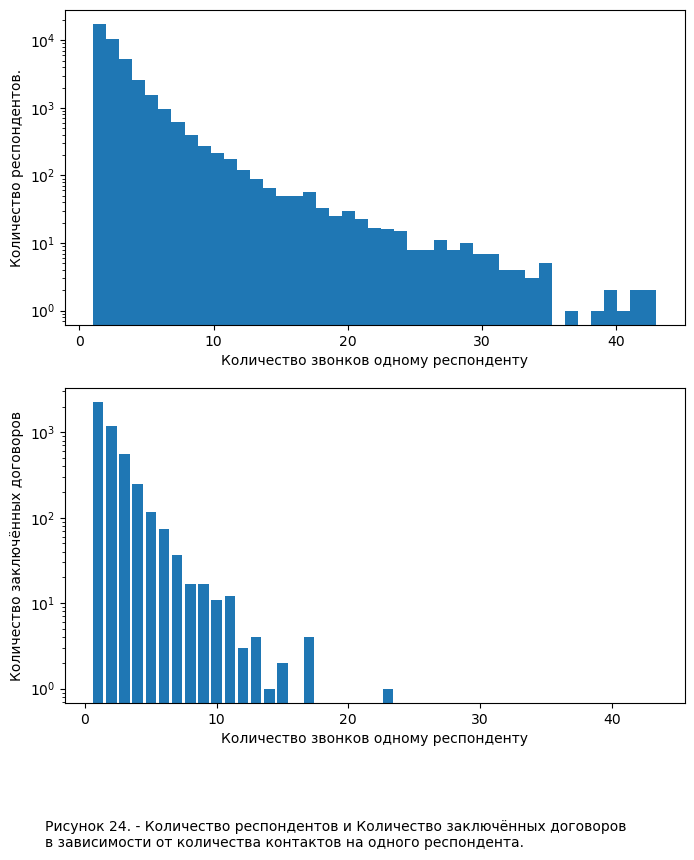

In [1951]:
plt.figure(figsize=(FIG_SIZE[0], FIG_SIZE[1] * 1.5))

plt.subplot(2, 1, 1)
plt.hist(x=df['contacts'], bins=43, log=True)

plt.xlabel("Количество звонков одному респонденту")
plt.ylabel("Количество респондентов.")

plt.subplot(2, 1, 2)
plt.bar(x=grouped.index, height=grouped['true'], log=True)

plt.xlabel("Количество звонков одному респонденту")
plt.ylabel("Количество заключённых договоров")
plt.figtext(*FIG_TEXT_POS,
            "Рисунок 24. - Количество респондентов \
и Количество заключённых договоров \n\
в зависимости от количества контактов на одного респондента.")

## Критерий хи-квадрат

Если посмотреть на количество контактов, как на категориальную переменную, то можно использовать критерий хи-квадрат.

In [1952]:
con_matrix = pd.crosstab(index=df['is_success'], columns=df['contacts'])
con_matrix

contacts,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,37,39,40,41,42,43
is_success,,,,,,,,,,,,,,,,,,,,,
False,14987,9122,4643,2338,1453,886,577,374,257,206,...,4,4,3,5,1,1,2,1,2,2
True,2240,1183,561,248,118,74,37,17,17,11,...,0,0,0,0,0,0,0,0,0,0


In [1953]:
#----------------------------------------------------------------------------80
H0 = "Вероятность заключения договора депозита\
    не зависит от числа контактов с респондентом" # Stating the Null Hypothesis
H1 = "Вероятность заключения договора \
    зависит от числа контактов с респондентом"

chi, p_value, dof, expected =  stats.chi2_contingency(con_matrix)

print(chi)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{H1} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(3)}) > 0.05')

208.09656379068645
Вероятность заключения договора     зависит от числа контактов с респондентом as the p_value (0.0) < 0.05


О чём говорит результат? Результат говорит о том, что вероятность получить такие (или ещё большие) различия в двух выборках (заключившие договор и незаключившие договор) меньше 0.05

Тогда возникает вопрос: а сколько нужно контактов с респондентом, чтобы он с бОльшей долей вероятности подписал договор? Или: После какого количества звонков вероятность заключения договора значимо уменшается.

Собственно, на *рис. 24* (вторая гистограмма) видно, что после 16 звонков одному респонденту договороы практически не заключаются.

# <a name="6">6. Выводы</a>

1. Исследовательский анализ показал:
   * 95% респондентов определяются за 2 контакта "заключать или не заключать договор" во время текущей маркетинговой компании (*рис. 9*).
   * Наиболее перспективными для проведения маркетинговых компаний являются месяцы с мая по август (*рис. 11*).
   * Слабая активность наблюдается в апреле-ноябре, а остальные месяцы для проведения маркетинговых компаний рекомендовать не можем.
   * Существенной зависимости от дня недели контакта отмечено не было, впрочем, здесь ещё остаётся простор для дополнительных исследований.
3. Поиск закономерностей не выявил значимых математических корреляций данных выборки с фактом заключения депозитного договора.
4. Регрессионный анализ не выявил значимых закономерностей исходных данных с фактом заключения депозитного договора.
5. Согласно результатам проверки гипотез:
   * Количество заключённых договоров зависит от числа звонков респонденту.
   * Делать больше 16 звонков одному респонденту бессмысленно (*рис. 24*).

**<center>Список литературы</center>**


**Нормативные правовые акты:**  
1.	Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

**Учебники и учебные пособия:**  
1.	Андерсон. К., Аналитическая культура: от сбора данных до бизнес-результатов. - Москва : Манн, Иванов и Фербер, 2017.  
2.	Нисчал Н., Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.  
3.	Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2021.  
4.	Пасхавер Б., Pandas в действии. — СПб.: Питер, 2023.  
5.	Плас Дж. Вандер., Python для сложных задач: наука о данных — СПб.: Питер, 2024.  
6.	Уилке К., Основы визуализации данных. Пособие по эффективной и убедительной подаче информации.— М.: Эксмо, 2024.  

**Электронные ресурсы:**  
1.	PEP 8 – руководство по стилю для кода Python [Электронный ресурс]: URL: https://peps.python.org/pep-0008/ ((дата обращения: 05.04.2024).  
2.	Сайт Python Academy [Электронный ресурс]: URL: https://www.python-academy.com/ (дата обращения: 05.04.2024).  
3.	[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, [http://dx.doi.org/10.1016/j.dss.2014.03.001](http://dx.doi.org/10.1016/j.dss.2014.03.001)